# Exploratory Data Analysis of CFPB Consumer Complaint Data

## Introduction

This notebook provides an exploratory data analysis (EDA) of the Consumer Financial Protection Bureau's (CFPB) Consumer Complaint Data. The CFPB collects and publishes data on consumer complaints about financial products and services. The dataset contains detailed information about each complaint, including the product or service involved, the issue and sub-issue, the company, the consumer's narrative, the company's response, and whether the response was timely.

The goal of this analysis is to understand the nature and frequency of consumer complaints, identify patterns and trends, and highlight areas that may require further investigation before diving into more complex analyses, such as natural language processing.

### Objectives

The primary objectives of this EDA are:

- To understand the distribution and frequency of consumer complaints across different financial products and services.
- To identify the most common issues and sub-issues reported by consumers.
- To analyze the narratives provided by consumers for potential duplicate entries.
- To visualize the percentage of duplicate narratives across different products.
- To prepare the data for future NLP tasks by cleaning and summarizing key aspects.

### About the Data

*    **Source**: The data used for this analysis comes from the [CFPB's complaint database](https://www.consumerfinance.gov/data-research/consumer-complaints/). This is a publicly accessible repository of consumer complaints about financial products and services that have been submitted to the CFPB. Please click the link above if you would like to learn more about the database and complaint process. Here is a [direct download link] (https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/?date_received_max=2024-05-31&date_received_min=2024-05-01&field=all&format=csv&no_aggs=true&size=209989&sort=created_date_desc). This link will provide the most up-to-date version of the data, using the filters used.
*   **Date Downlaoded**: The data used for this analysis was downlaoded on 8/4/2024. Complaint data can change over time if additional information is received. [Here is a link to the data used for this analysis](https://drive.google.com/file/d/1KGJRiHk2tANsJxwLqkWRctO8ILMYsv-K/view?usp=sharing) (CSV file, approximately 127 MB).
*   **Filter**: I filtered the database to only include complaints submitted in May 2024, which consists of fairly recent complaints for which companies have had a reasonable amount of time to provide their response, if any.
*   **Total complaints**: The data constis of 209,989 complaints.
*   **Fields**: The dataset constsis of seventeen (18) fields:
  - **Date received**: The data the complaint was received by the CFPB.
  - **Product**: General category of the financial product related to the complaint.
  - **Sub-product**: Specific product within the general category related to the complaint.
  - **Issue**: Main problem described in the complaint.
  - **Sub-issue**: Detailed aspect of the main issue.
  - **Consumer complaint narrative**: Detailed description provided by the consumer.
  - **Company public response**: Company's public reply to the complaint.
  - **Company**: Name of the company the complaint is about.
  - **State**: State where the consumer is located.
  - **ZIP code**: ZIP code of the consumer's location.
  - **Tags**: Additional tags categorizing the complaint.
  - **Consumer consent provided?**: Indicates if the consumer consented to publish their narrative.
  - **Submitted via**: Method by which the complaint was submitted.
  - **Date sent to company**: Date the complaint was forwarded to the company.
  - **Company response to consumer**: Company's response to the consumer.
  - **Timely response?**: Indicates if the company responded in a timely manner.
  - **Consumer disputed?**: Indicates if the consumer disputed the company's response.
  - **Complaint ID**: Unique identifier for the complaint.

## Setup

In [1]:
# Import python libraries
import numpy as np  # Numerical operations and handling arrays
import pandas as pd  # Data manipulation and analysis, especially for structured data
import matplotlib.pyplot as plt  # Plotting and visualization of data
import seaborn as sns  # Statistical data visualization, built on top of matplotlib

### Load Data



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/AI-ML Compliance/CFPB Complaints/complaints-2024-05-May.csv')

### Clean Data

First, I will ensure that the data is clean, consistent, and ready for further analysis.

Let's use the .info() and .head() methods to get a quick overview of the structure and quality of the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209989 entries, 0 to 209988
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 209989 non-null  object 
 1   Product                       209989 non-null  object 
 2   Sub-product                   209988 non-null  object 
 3   Issue                         209988 non-null  object 
 4   Sub-issue                     207073 non-null  object 
 5   Consumer complaint narrative  70876 non-null   object 
 6   Company public response       118535 non-null  object 
 7   Company                       209989 non-null  object 
 8   State                         209528 non-null  object 
 9   ZIP code                      209988 non-null  object 
 10  Tags                          8306 non-null    object 
 11  Consumer consent provided?    206155 non-null  object 
 12  Submitted via                 209989 non-nul

In [5]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/20/24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I checked my credit report and I am upset abou...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,322XX,NaN,Consent provided,Web,05/20/24,Closed with explanation,Yes,NaN,9052112
1,05/17/24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",LA,70739,NaN,Consent not provided,Web,05/17/24,Closed with non-monetary relief,Yes,NaN,9036168
2,05/17/24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",LA,70058,NaN,Consent not provided,Web,05/17/24,Closed with non-monetary relief,Yes,NaN,9032533
3,05/20/24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,33178,NaN,Consent not provided,Web,05/20/24,Closed with explanation,Yes,NaN,9051858
4,05/18/24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,44124,NaN,Consent not provided,Web,05/18/24,Closed with non-monetary relief,Yes,NaN,9033383


**Observations**

- Number of complaints: 209,988 (RangeIndex)
- Number of columns: 18
- Non-null count: Indicates the number of non-null (non-missing) values in each column, helping to identify missing data. Any columns with fewer than 209,989 entries (the total number of complaints in this data) may have missing data.
  - Sub-issue: 2,916 missing entries (209,989 - 207,073).
  - Consumer complaint narrative: 139,113 missing entries (209,989 - 70,876).
  - Company public response: 91,454 missing entries (209,989 - 118,535).
  - State: 461 missing entries (209,989 - 209,528).
  - ZIP code: 1 missing entry (209,989 - 209,988).
  - Tags: 201,683 missing entries (209,989 - 8,306).
  - Consumer consent provided?: 3,834 missing entries (209,989 - 206,155).
  - Consumer disputed?: All entries are missing (0 non-null entries).
- Data types: The data consists of 3 data types:
    - float64: a floating-point number (example: 1.3)
        - 1 column: "Consumer disputed?" (Note: This column has 0 non-null entries, meaning it is entirely missing data)
    - int64: an integer (example: 2)
        - 1 column: "Complaint ID" (Note: This column uniquely identifies each complaint and has no missing values)
    - object: a general-purpose data type, usually text
        - 16 columns: everything else

####Converting Date Columns to Datetime Objects

Currently, the "Date received" and "Date sent to company" fields are "object" data types. We want to convert these to datetime objects in pandas, which will allow for various date-related operations, such as finding the number of days between two dates, finding trends over time, and so on. As we can see above, the dates are fomatted month-day-year (example:	05/20/24).

In [6]:
# Specify the date format
date_format = '%m/%d/%y'

# Convert date columns to datetime objects with the specified format
data['Date received'] = pd.to_datetime(data['Date received'], format=date_format, errors='coerce')
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'], format=date_format, errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209989 entries, 0 to 209988
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 209989 non-null  datetime64[ns]
 1   Product                       209989 non-null  object        
 2   Sub-product                   209988 non-null  object        
 3   Issue                         209988 non-null  object        
 4   Sub-issue                     207073 non-null  object        
 5   Consumer complaint narrative  70876 non-null   object        
 6   Company public response       118535 non-null  object        
 7   Company                       209989 non-null  object        
 8   State                         209528 non-null  object        
 9   ZIP code                      209988 non-null  object        
 10  Tags                          8306 non-null    object        
 11  Consumer cons

As we can see above, the "Date received" and "Date sent to company" fields are now both datetime objects.

#### Filling Missing Values

A number of columns have "NaN" values, which means "not a number". This usually means that a value was not provided. Let's replace NaN with values that more accurately explain what it means that a value was not provided.

In [8]:
# Fill in missing 'Sub-issue' and 'Consumer complaint narrative' with empty text
data['Sub-issue'] = data['Sub-issue'].fillna('')
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('')

In [9]:
# Fill in missing 'Company public response' with 'No response'
data['Company public response'] = data['Company public response'].fillna('No response')

In [10]:
# Fill in missing 'Tags' with 'No tags'
data['Tags'] = data['Tags'].fillna('No tags')

In [11]:
# Fill in 'Consumer consent provided' with 'Unknown'
data['Consumer consent provided?'] = data['Consumer consent provided?'].fillna('Unknown')

In [12]:
# Fill in 'Sub-issue' with 'No Sub-issue'
data['Sub-issue'] = data['Sub-issue'].fillna('No Sub-issue')


In [13]:
# Fill in the 'Product' with 'No Product'
data['Issue'] = data['Issue'].fillna('No issue')

In [14]:
# Fill in the 'Sub-product' with 'No Sub-product'
data['Sub-product'] = data['Sub-product'].fillna('No Sub-product')

In [15]:
# Fill in the 'State' with 'No State'
data['State'] = data['State'].fillna('No State')

In [16]:
# Fill in the 'ZIP code' with 'No Zip code'
data['ZIP code'] = data['ZIP code'].fillna('No Zip code')

In [17]:
# Fill in missing 'Company response to consumer' with 'No response'
data['Company response to consumer'] = data['Company response to consumer'].fillna('No response')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209989 entries, 0 to 209988
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 209989 non-null  datetime64[ns]
 1   Product                       209989 non-null  object        
 2   Sub-product                   209989 non-null  object        
 3   Issue                         209989 non-null  object        
 4   Sub-issue                     209989 non-null  object        
 5   Consumer complaint narrative  209989 non-null  object        
 6   Company public response       209989 non-null  object        
 7   Company                       209989 non-null  object        
 8   State                         209989 non-null  object        
 9   ZIP code                      209989 non-null  object        
 10  Tags                          209989 non-null  object        
 11  Consumer cons

As we can see, we no longer have any missing values (except for the Consumer disputed? column, which we will handle next)

#### Drop 'Consumer disputed?' and ComplaintID columns
- Since the 'Consumer disputed?' column has no data, we will drop it.
- Since the Complaint ID column does not contain useful information, we will drop it as well.

In [19]:
### Drop 'Consumer disputed?' column since it has no data
data.drop(columns=['Consumer disputed?'], inplace=True)

In [20]:
### Drop 'Complaint ID' column
data.drop(columns=['Complaint ID'], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209989 entries, 0 to 209988
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 209989 non-null  datetime64[ns]
 1   Product                       209989 non-null  object        
 2   Sub-product                   209989 non-null  object        
 3   Issue                         209989 non-null  object        
 4   Sub-issue                     209989 non-null  object        
 5   Consumer complaint narrative  209989 non-null  object        
 6   Company public response       209989 non-null  object        
 7   Company                       209989 non-null  object        
 8   State                         209989 non-null  object        
 9   ZIP code                      209989 non-null  object        
 10  Tags                          209989 non-null  object        
 11  Consumer cons

The data has now been cleaned, so we are ready to move on to the exploratory data analysis phase.

## Exploratory Data Analysis

### Univariate Analysis

Let's start by exploring the data in each column individually.

#### Date Received

Let's plot the number of complaints received over time.

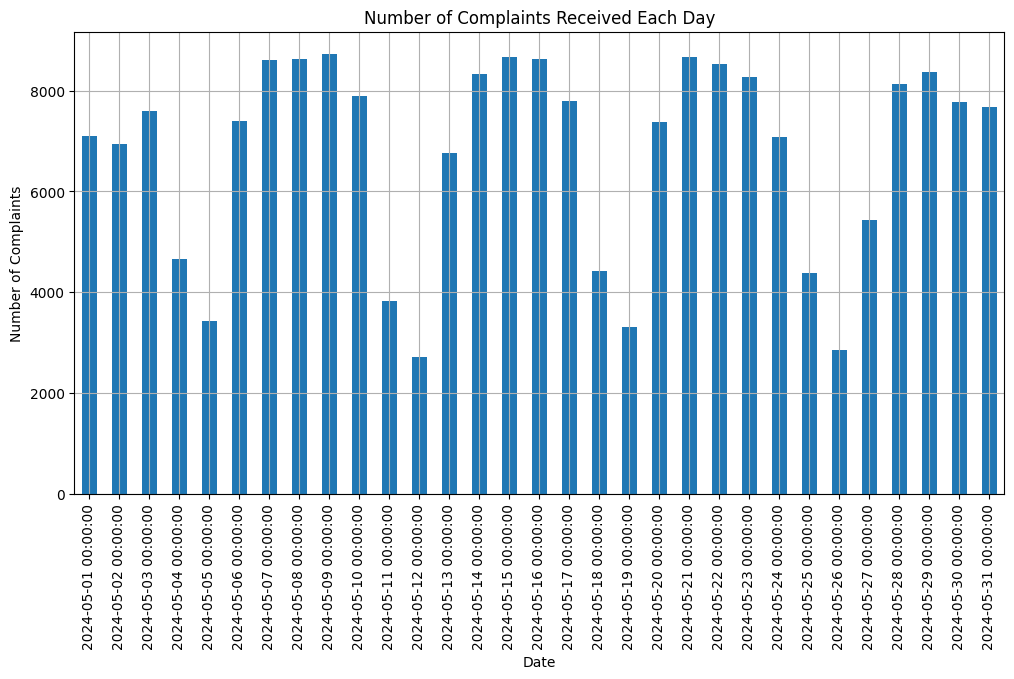

In [22]:
# Count the number of complaints per day
complaints_per_day = data['Date received'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(12, 6))
complaints_per_day.plot(kind='bar')
plt.title('Number of Complaints Received Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

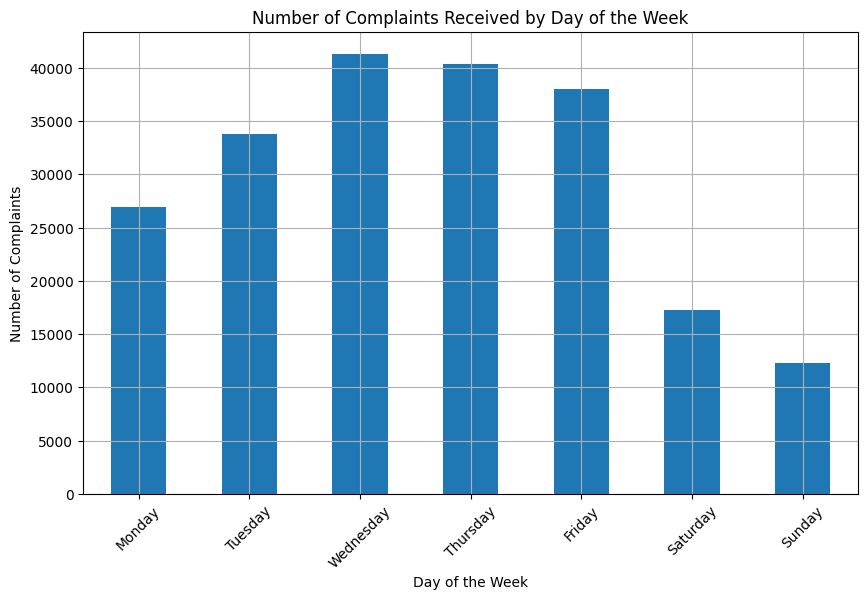

In [23]:
# Extract the day of the week
data['Day of Week'] = data['Date received'].dt.day_name()

# Count the number of complaints for each day of the week
complaints_by_day = data['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count the number of complaints for each day of the week
complaints_by_day = data['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the distribution
plt.figure(figsize=(10, 6))
complaints_by_day.plot(kind='bar')
plt.title('Number of Complaints Received by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations**

- More complaints are submitted on weekdays than on weekends.

#### Product

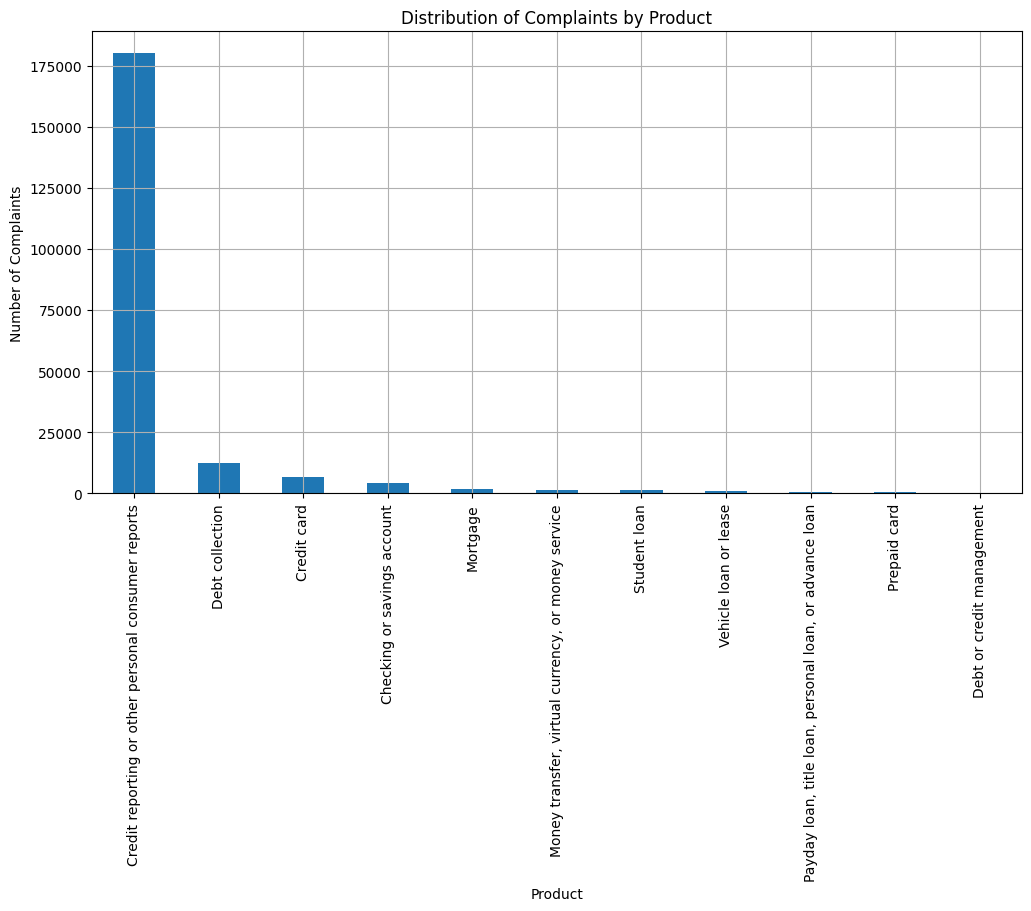

In [24]:
# Ensure the 'Product' column has no leading/trailing spaces in its values
data['Product'] = data['Product'].str.strip()

# Count the number of complaints for each product
product_counts = data['Product'].value_counts()

# Plot the distribution of products
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

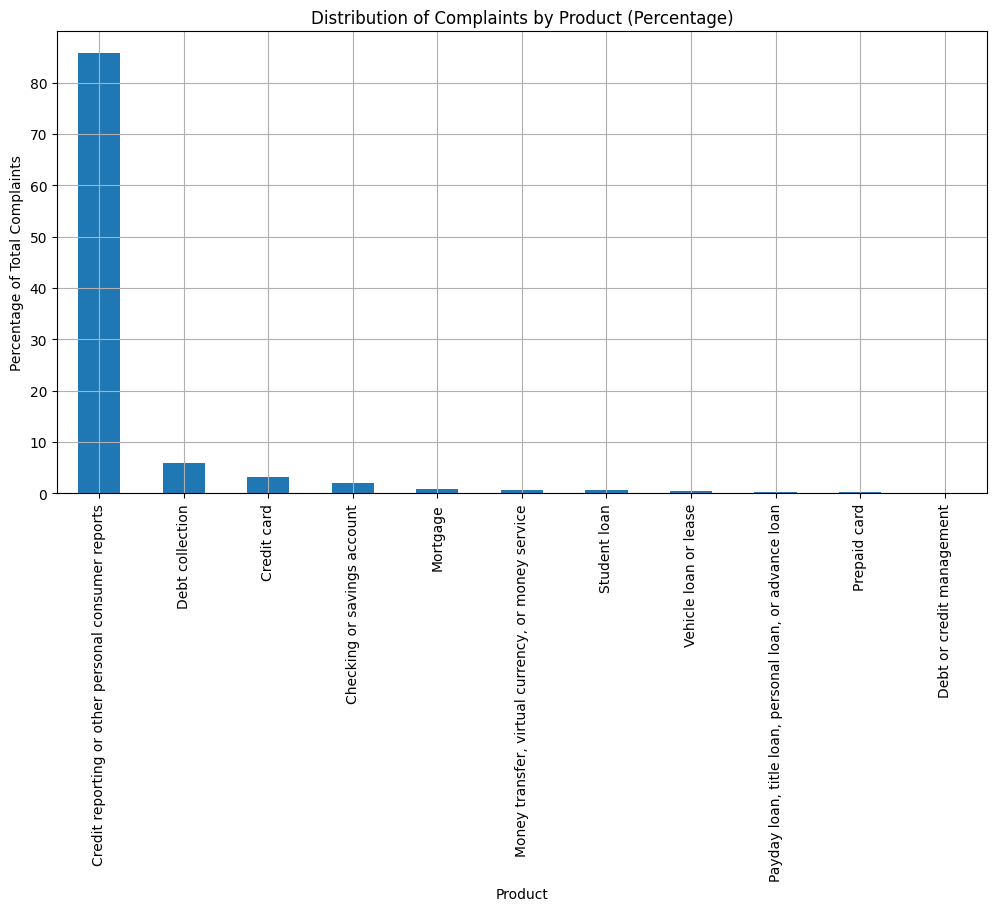

In [25]:
# Count the number of complaints for each product
product_counts = data['Product'].value_counts()

# Calculate the percentage of total complaints for each product
product_percentages = (product_counts / product_counts.sum()) * 100

# Plot the distribution of products as a percentage
plt.figure(figsize=(12, 6))
product_percentages.plot(kind='bar')
plt.title('Distribution of Complaints by Product (Percentage)')
plt.xlabel('Product')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [26]:
# Count the number of complaints for each product
product_counts = data['Product'].value_counts()

# Calculate the percentage of total complaints for each product
product_percentages = (product_counts / product_counts.sum()) * 100

# Create a DataFrame to display the results
product_distribution = pd.DataFrame({
    'Count': product_counts,
    'Percentage': product_percentages
})

# Reset the index to have 'Product' as a column
product_distribution.reset_index(inplace=True)
product_distribution.rename(columns={'index': 'Product'}, inplace=True)

# Display the table
print(product_distribution)

                                              Product   Count  Percentage
0   Credit reporting or other personal consumer re...  179932   85.686393
1                                     Debt collection   12270    5.843163
2                                         Credit card    6678    3.180167
3                         Checking or savings account    4450    2.119159
4                                            Mortgage    1693    0.806233
5   Money transfer, virtual currency, or money ser...    1320    0.628604
6                                        Student loan    1238    0.589555
7                               Vehicle loan or lease    1027    0.489073
8   Payday loan, title loan, personal loan, or adv...     693    0.330017
9                                        Prepaid card     521    0.248108
10                          Debt or credit management     167    0.079528


**Observations**
* The majority of complaints (85.69%) are for creidt reporting issues.
* Debt collection is the second most common product type (5.84%).
* Neither credit reporting nor debt collection are "products" in the traditional sense. Instead, they are activites financial institutions engage in that often have a significant negative impact on consumers. For this reason, it is not too surprising that these two categories dominate. The credit reporting and debt collection complaints are likely related to other products in many cases. Thus, the distribution of complaints among various "products" may not be well represented here.

#### Sub-product

                                         Sub-product   Count  Percentage
0                                   Credit reporting  179297   85.383996
1         General-purpose credit card or charge card    5991    2.853007
2                                      I do not know    5169    2.461558
3                                   Checking account    3554    1.692470
4                                         Other debt    2191    1.043388
5                                   Credit card debt    2150    1.023863
6                         Conventional home mortgage    1025    0.488121
7                                               Loan     896    0.426689
8                            Telecommunications debt     771    0.367162
9                                        Rental debt     709    0.337637
10                                 Store credit card     687    0.327160
11                    Federal student loan servicing     640    0.304778
12                    Other personal consumer repor

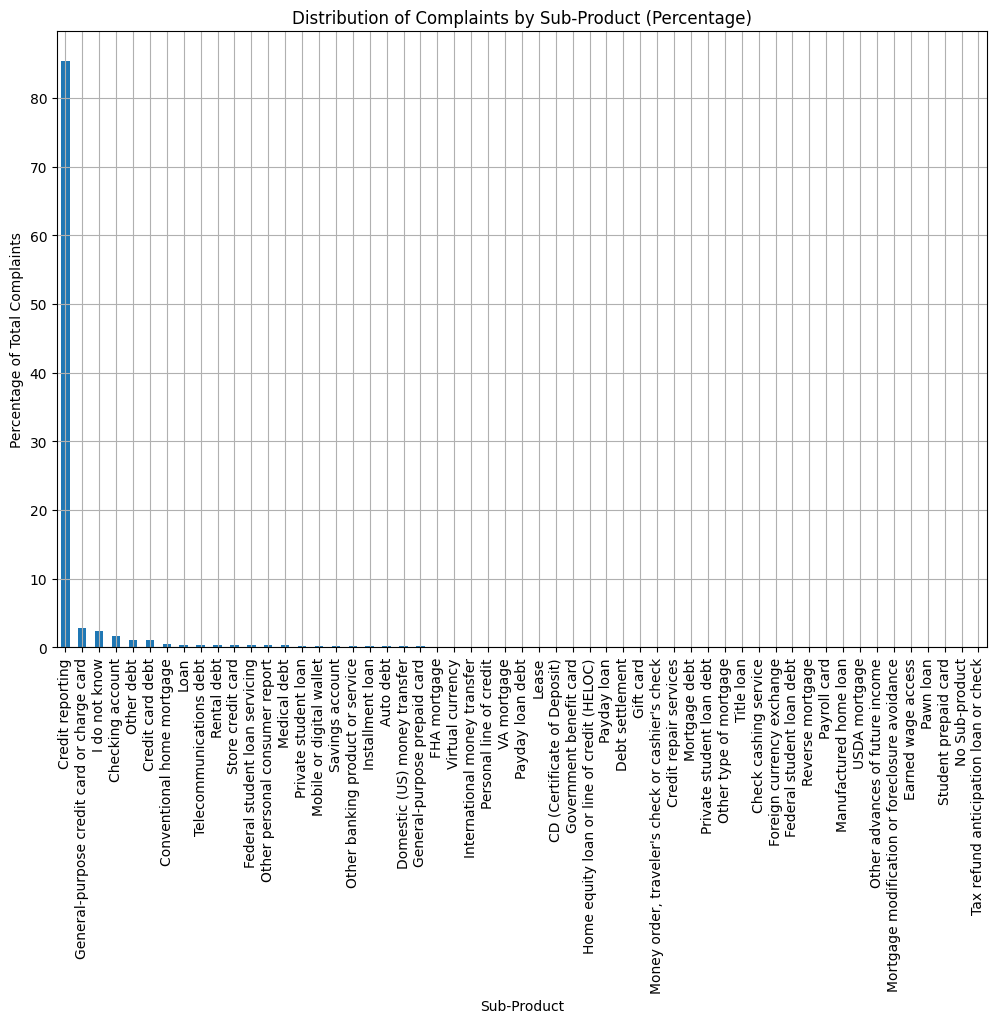

In [27]:
# Ensure the 'Sub-product' column has no leading/trailing spaces in its values
data['Sub-product'] = data['Sub-product'].str.strip()

# Count the number of complaints for each sub-product
sub_product_counts = data['Sub-product'].value_counts()

# Calculate the percentage of total complaints for each sub-product
sub_product_percentages = (sub_product_counts / sub_product_counts.sum()) * 100

# Create a DataFrame to display the results
sub_product_distribution = pd.DataFrame({
    'Count': sub_product_counts,
    'Percentage': sub_product_percentages
})

# Reset the index to have 'Sub-product' as a column
sub_product_distribution.reset_index(inplace=True)
sub_product_distribution.rename(columns={'index': 'Sub-product'}, inplace=True)

# Display the table
print(sub_product_distribution)

# Plot the distribution of sub-products as a percentage
plt.figure(figsize=(12, 8))
sub_product_distribution.set_index('Sub-product')['Percentage'].plot(kind='bar')
plt.title('Distribution of Complaints by Sub-Product (Percentage)')
plt.xlabel('Sub-Product')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**

- Again, credit reporting dominates (85.38%)

#### Issue


                                                Issue  Count  Percentage
0                Incorrect information on your report  83031   39.540643
1                         Improper use of your report  57328   27.300478
2   Problem with a company's investigation into an...  39713   18.911943
3                   Attempts to collect debt not owed   5502    2.620137
4                     Written notification about debt   4755    2.264404
..                                                ...    ...         ...
82                          Problem with cash advance      1    0.000476
83                                           No issue      1    0.000476
84  Was approved for a loan, but didn't receive money      1    0.000476
85                              Lost or stolen refund      1    0.000476
86            Overdraft, savings, or rewards features      1    0.000476

[87 rows x 3 columns]


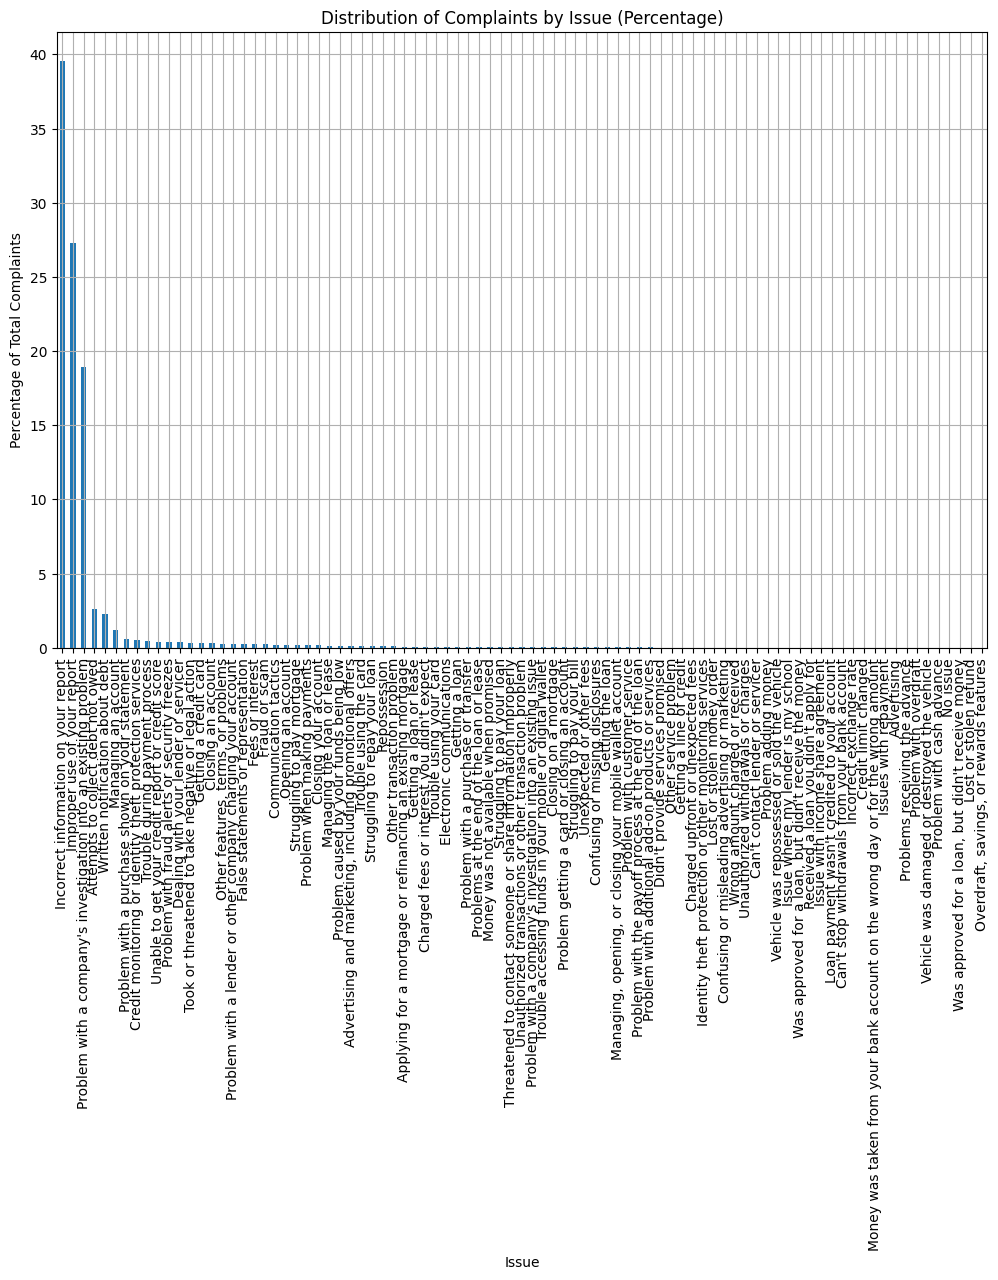

In [28]:
# Ensure the 'Issue' column has no leading/trailing spaces in its values
data['Issue'] = data['Issue'].str.strip()

# Count the number of complaints for each issue
issue_counts = data['Issue'].value_counts()

# Calculate the percentage of total complaints for each issue
issue_percentages = (issue_counts / issue_counts.sum()) * 100

# Create a DataFrame to display the results
issue_distribution = pd.DataFrame({
    'Count': issue_counts,
    'Percentage': issue_percentages
})

# Reset the index to have 'Issue' as a column
issue_distribution.reset_index(inplace=True)
issue_distribution.rename(columns={'index': 'Issue'}, inplace=True)

# Display the table
print(issue_distribution)

# Plot the distribution of issues as a percentage
plt.figure(figsize=(12, 8))
issue_distribution.set_index('Issue')['Percentage'].plot(kind='bar')
plt.title('Distribution of Complaints by Issue (Percentage)')
plt.xlabel('Issue')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

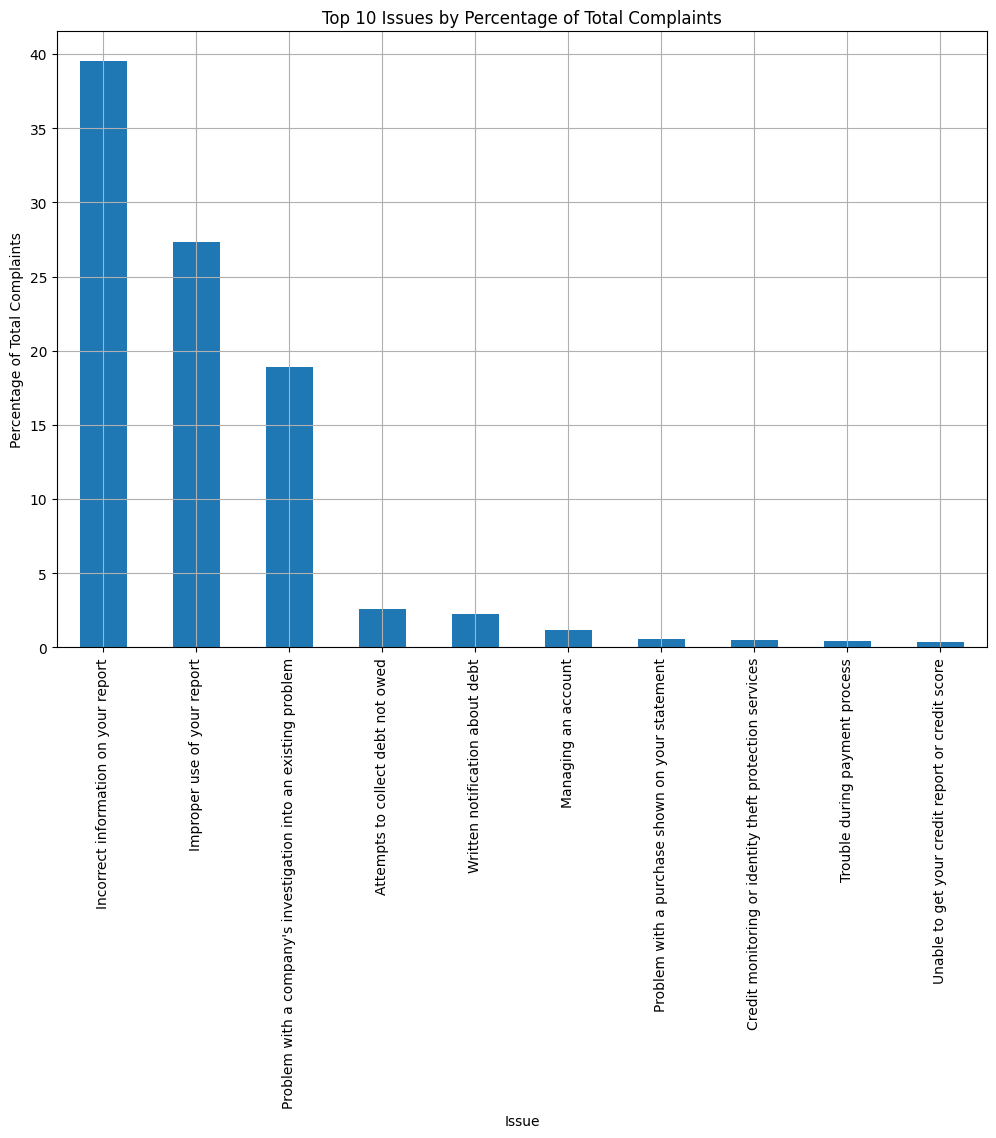

In [29]:
# Let's focus on the top 10 issues

# Define the number of top issues to display
top_n = 10

# Filter to show only the top N issues
top_issues = issue_distribution.head(top_n)

# Plot the distribution of top issues as a percentage
plt.figure(figsize=(12, 8))
top_issues.set_index('Issue')['Percentage'].plot(kind='bar')
plt.title(f'Top {top_n} Issues by Percentage of Total Complaints')
plt.xlabel('Issue')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**
- There are 86 unique issues.
- Again, most of the issues are related to credit reporting and debt collection.

#### Sub-issue


                                           Sub-issue  Count  Percentage
0                Information belongs to someone else  54036   25.732776
1      Reporting company used your report improperly  38989   18.567163
2  Their investigation did not fix an error on yo...  22865   10.888666
3  Credit inquiries on your report that you don't...  18075    8.607594
4                      Account information incorrect  10937    5.208368
5                           Account status incorrect  10918    5.199320
6               Investigation took more than 30 days   9145    4.354990
7  Was not notified of investigation status or re...   5756    2.741096
8                     Personal information incorrect   5059    2.409174
9                                  Debt is not yours   3347    1.593893


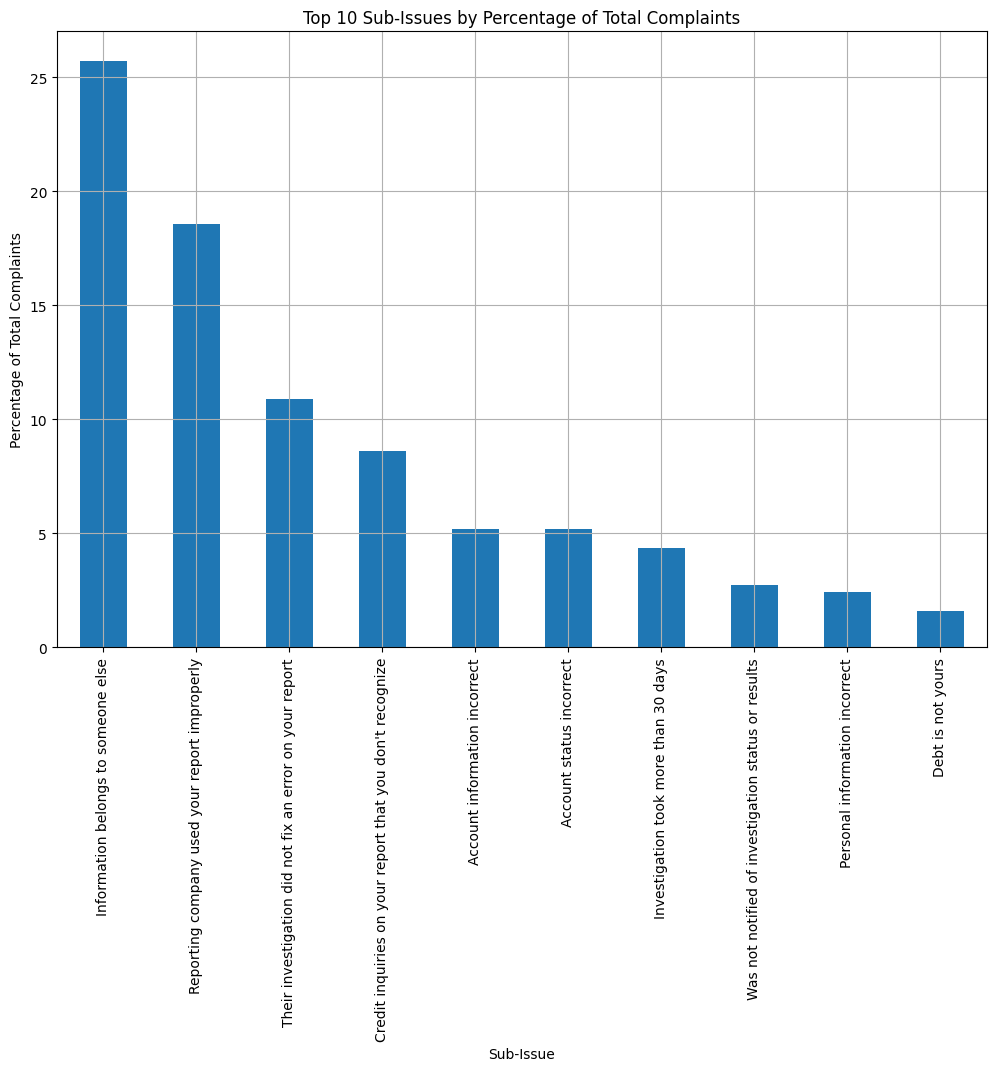

In [30]:
# Ensure the 'Sub-issue' column has no leading/trailing spaces in its values
data['Sub-issue'] = data['Sub-issue'].str.strip()

# Count the number of complaints for each sub-issue
sub_issue_counts = data['Sub-issue'].value_counts()

# Calculate the percentage of total complaints for each sub-issue
sub_issue_percentages = (sub_issue_counts / sub_issue_counts.sum()) * 100

# Create a DataFrame to display the results
sub_issue_distribution = pd.DataFrame({
    'Count': sub_issue_counts,
    'Percentage': sub_issue_percentages
})

# Reset the index to have 'Sub-issue' as a column
sub_issue_distribution.reset_index(inplace=True)
sub_issue_distribution.rename(columns={'index': 'Sub-issue'}, inplace=True)

# Define the number of top sub-issues to display
top_n = 10

# Filter to show only the top N sub-issues
top_sub_issues = sub_issue_distribution.head(top_n)

# Display the table of top sub-issues
print(top_sub_issues)

# Plot the distribution of top sub-issues as a percentage
plt.figure(figsize=(12, 8))
top_sub_issues.set_index('Sub-issue')['Percentage'].plot(kind='bar')
plt.title(f'Top {top_n} Sub-Issues by Percentage of Total Complaints')
plt.xlabel('Sub-Issue')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**
- The sub-issues break the credit reporting issue into a more evenly-distributed set of categories.
- The most common sub-issue is "Information belongs to someone else" (25.73%).

#### Consumer Complaint Narrative


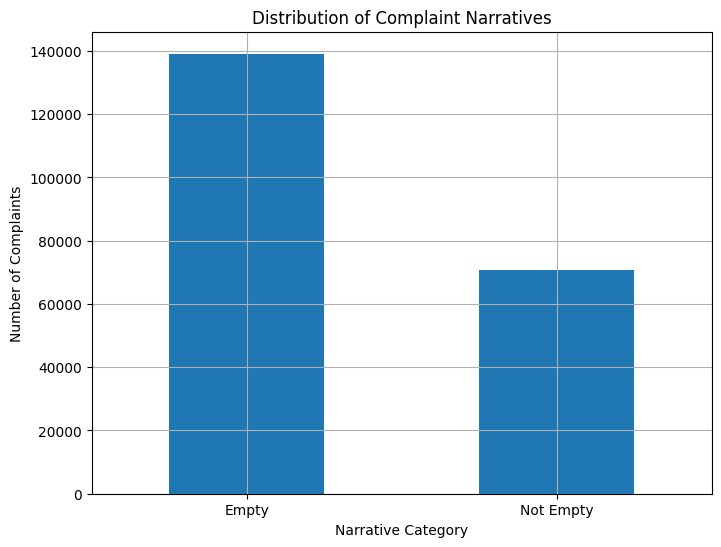

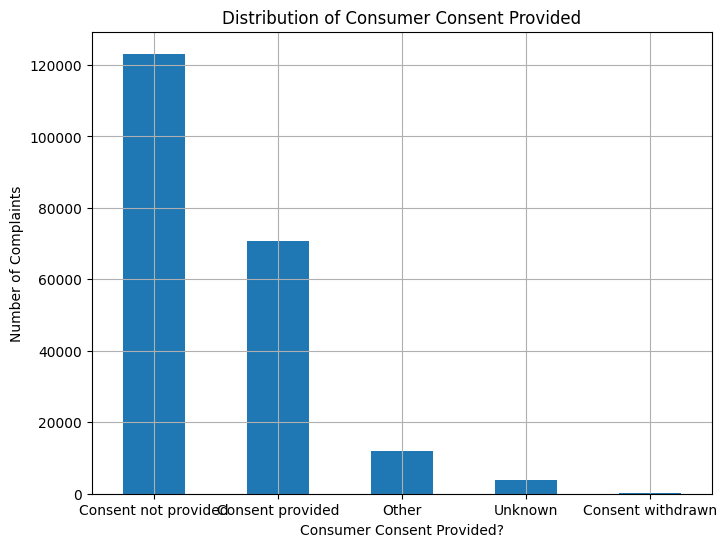

In [31]:
# Ensure the 'Consumer complaint narrative' column has no leading/trailing spaces in its values
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].str.strip()

# Create a new column for narrative categories
data['Narrative Category'] = data['Consumer complaint narrative'].apply(lambda x: 'Not Empty' if pd.notnull(x) and x.strip() != '' else 'Empty')

# Count the number of complaints with empty and non-empty narratives
narrative_counts = data['Narrative Category'].value_counts()

# Plot the distribution of narrative categories
plt.figure(figsize=(8, 6))
narrative_counts.plot(kind='bar')
plt.title('Distribution of Complaint Narratives')
plt.xlabel('Narrative Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Ensure the 'Consumer consent provided?' column has no leading/trailing spaces in its values
data['Consumer consent provided?'] = data['Consumer consent provided?'].str.strip()

# Count the number of each category in the 'Consumer consent provided?' column
consent_counts = data['Consumer consent provided?'].value_counts()

# Plot the distribution of consumer consent provided
plt.figure(figsize=(8, 6))
consent_counts.plot(kind='bar')
plt.title('Distribution of Consumer Consent Provided')
plt.xlabel('Consumer Consent Provided?')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [32]:
# Calculate the percentage of complaints with non-empty narratives
total_complaints = len(data)
non_empty_narratives = data['Narrative Category'].value_counts().get('Not Empty', 0)
percentage_non_empty_narratives = (non_empty_narratives / total_complaints) * 100

print(f"Total number of complaints with non-empty narrative: {non_empty_narratives}")
print(f"Percentage of complaints with non-empty narrative: {percentage_non_empty_narratives:.2f}%")

# Ensure the 'Consumer consent provided?' column has no leading/trailing spaces in its values
data['Consumer consent provided?'] = data['Consumer consent provided?'].str.strip()

# Calculate the percentage of complaints where consent was provided
consent_provided_counts = data['Consumer consent provided?'].value_counts()
consent_provided = consent_provided_counts.get('Consent provided', 0)
percentage_consent_provided = (consent_provided / total_complaints) * 100

print(f"Percentage of complaints where consent was provided: {percentage_consent_provided:.2f}%")

Total number of complaints with non-empty narrative: 70876
Percentage of complaints with non-empty narrative: 33.75%
Percentage of complaints where consent was provided: 33.75%


In [33]:
# Find Duplicate Narratives
# Filter out empty strings
narratives_non_empty = data[data['Consumer complaint narrative'] != '']

# Identify duplicate narratives (mark all duplicates)
duplicates = narratives_non_empty['Consumer complaint narrative'].duplicated(keep=False)

# Count the number of duplicate narratives (excluding empty strings)
num_duplicates = duplicates.sum()

# Identify unique duplicates (mark the first occurrence of each duplicate narrative as True)
unique_duplicates = narratives_non_empty['Consumer complaint narrative'].duplicated(keep='first')

# Count the number of unique duplicate narratives
num_unique_duplicates = unique_duplicates.sum()

# Get the unique duplicate narratives
unique_duplicate_narratives = narratives_non_empty[unique_duplicates]

# Count the occurrences of each duplicate narrative
duplicate_counts = unique_duplicate_narratives['Consumer complaint narrative'].value_counts()

# Get the top 10 most common duplicate narratives
top_10_duplicates = duplicate_counts.head(10)

# Create a DataFrame for the top 10 duplicates
top_10_duplicates_df = pd.DataFrame({
    'Consumer complaint narrative': top_10_duplicates.index,
    'Count': top_10_duplicates.values
})

# Count the number of unique narratives
num_unique_narratives = narratives_non_empty['Consumer complaint narrative'].nunique()

# Print the results
print(f"Number of unique narratives (excluding empty strings): {num_unique_narratives}")
print(f"Number of duplicate narratives (excluding empty strings): {num_duplicates}")
print(f"Number of unique duplicate narratives: {num_unique_duplicates}")
print("Top 10 most commonly duplicated narratives and the count for each:")
print(top_10_duplicates_df)

# Print the full text of the narrative for the top 3 most common duplicates
print("\nFull text of the narrative for the top 3 most common duplicates:")
for i in range(3):
    print(f"\nNarrative {i + 1} (Count: {top_10_duplicates_df.iloc[i]['Count']}):")
    print(top_10_duplicates_df.iloc[i]['Consumer complaint narrative'])

Number of unique narratives (excluding empty strings): 40376
Number of duplicate narratives (excluding empty strings): 35214
Number of unique duplicate narratives: 30500
Top 10 most commonly duplicated narratives and the count for each:
                        Consumer complaint narrative  Count
0  In accordance with the Fair Credit Reporting a...   1157
1  My credit reports are inaccurate. These inaccu...    771
2  I recognize the significance of eliminating an...    488
3  I filed a dispute for incorrect information on...    467
4  I want to make it clear that I didn't give wri...    374
5  I'm really not sure what happened. I have mail...    373
6  I have consistently maintained on-time payment...    323
7  I want to emphasize that I did not provide wri...    312
8  I'm really not sure what happened. I have mail...    310
9  The conspicuous lack of concrete evidence subs...    310

Full text of the narrative for the top 3 most common duplicates:

Narrative 1 (Count: 1157):
In accord

Top 3 most commonly duplicate narratives:

**Narrative 1 (Count: 1157)**

In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681.

15 U.S.C 1681 section 602 A. States I have the right to privacy.

15 U.S.C 1681 Section 604 A Section 2 : It also states a consumer reporting agency can not furnish a account without my written instructions 15 U.S.C 1681c. ( a ) ( 5 ) Section States : no consumer reporting agency may make any consumer report containing any of the following items of information Any other adverse item of information, other than records of convictions of crimes which antedates the report by more than seven years.

15 U.S.C. 1681s-2 ( A ) ( 1 ) A person shall not furnish any information relating to a consumer to any consumer reporting agency if the person knows or has reasonable cause to believe that the information is inaccurate.

**Narrative 2 (Count: 771)**

My credit reports are inaccurate. These inaccuracies are causing creditors to deny me credit. You have the duty to report accurate information about consumers. Please investigate these accounts and inquires and update these accounts accordingly to avoid future litigation.

**Narrative 3 (Count: 488)**

I recognize the significance of eliminating any erroneous entries from my credit report, as required by FCRA 605B. Would you mind examining the documents? I've identified several accounts that appear to be inaccurate, and this is troubling to me.

**Observations**

- There are 70,876 complaint narratives.
- Approximately one third (33.75%) of complaints provided consent to share the complaint narrative.
- 40,376 complaints are unique (different from each other).
- 35,214 complaints have narratives that are identical to the narrative of at least one other complaint in the dataset.
- The most commonly-duplicated narrative is used in 1,157 complaints, suggesting that these complaints may have come from a common source, such as a credit repair company that submits complaints on behalf of their clients.
- To protect consumer privacy and sensitive account information, the CFPB does not publish information related to the identity of the individual who files a complaint and the specific accounts in question, so the public data does not provide information that would allow us to determine how many of these complaints are truly duplicates (complaints about the same account and same issue). The number of complaints could be inflated if it includes true duplicates.
- An alternative reason for so many duplicate narratives is that consumers are utilizing template language (for example, that they might have found on a popular credit repair website).



#### Company Public Response


In [34]:
# Ensure the 'Company public response' column has no leading/trailing spaces in its values
data['Company public response'] = data['Company public response'].str.strip()

# Filter out empty strings
responses_non_empty = data[data['Company public response'] != '']

# Identify duplicate responses (mark all duplicates)
duplicates = responses_non_empty['Company public response'].duplicated(keep=False)

# Count the number of duplicate responses (excluding empty strings)
num_duplicates = duplicates.sum()

# Identify unique duplicates (mark the first occurrence of each duplicate response as True)
unique_duplicates = responses_non_empty['Company public response'].duplicated(keep='first')

# Count the number of unique duplicate responses
num_unique_duplicates = unique_duplicates.sum()

# Get the unique duplicate responses
unique_duplicate_responses = responses_non_empty[unique_duplicates]

# Count the occurrences of each duplicate response
duplicate_counts = unique_duplicate_responses['Company public response'].value_counts()

# Get the top 10 most common duplicate responses
top_10_duplicates = duplicate_counts.head(10)

# Create a DataFrame for the top 10 duplicates
top_10_duplicates_df = pd.DataFrame({
    'Company public response': top_10_duplicates.index,
    'Count': top_10_duplicates.values
})

# Count the number of unique responses
num_unique_responses = responses_non_empty['Company public response'].nunique()

# Print the results
print(f"Number of duplicate responses (excluding empty strings): {num_duplicates}")
print(f"Number of unique duplicate responses: {num_unique_duplicates}")
print(f"Number of unique responses: {num_unique_responses}")
print("Top 10 most commonly duplicated responses and the count for each:")
print(top_10_duplicates_df)

# Print the full text of the response for the top 3 most common duplicates
print("\nFull text of the response for the top 3 most common duplicates:")
for i in range(3):
    print(f"\nResponse {i + 1} (Count: {top_10_duplicates_df.iloc[i]['Count']}):")
    print(top_10_duplicates_df.iloc[i]['Company public response'])

Number of duplicate responses (excluding empty strings): 209989
Number of unique duplicate responses: 209979
Number of unique responses: 10
Top 10 most commonly duplicated responses and the count for each:
                             Company public response   Count
0  Company has responded to the consumer and the ...  115716
1                                        No response   91453
2  Company believes it acted appropriately as aut...    2313
3  Company disputes the facts presented in the co...     135
4  Company believes the complaint provided an opp...      83
5  Company believes complaint caused principally ...      71
6  Company believes the complaint is the result o...      66
7  Company can't verify or dispute the facts in t...      65
8  Company believes complaint represents an oppor...      47
9  Company believes complaint is the result of an...      30

Full text of the response for the top 3 most common duplicates:

Response 1 (Count: 115716):
Company has responded to the 

**Observations**
- The most common response (115,716) is "Company has responded to the consumer and the CFPB and chooses not to provide a public response." These could be recategorized as "No response".
- If we combine the first two categories into "No response", we get 207,169 complaints without a response from the company. That is 98.66% of complaints (207,169/209,988) that don't have a response from the company. The percentage could be higher if other responses essentially say that there is no response.
- The most common actual response is "Company believes it acted appropriately as authorized by contract or law"
- Credit reporting agencies most likely have template language they use for many, if not all, of the responses.

#### Company


Top 15 companies with the most complaints and the percentage of total complaints:
                                   Company  Count  Percentage
0                            EQUIFAX, INC.  59045   28.118140
1   TRANSUNION INTERMEDIATE HOLDINGS, INC.  58900   28.049088
2      Experian Information Solutions Inc.  58303   27.764788
3        CAPITAL ONE FINANCIAL CORPORATION   1654    0.787660
4                     JPMORGAN CHASE & CO.   1557    0.741467
5                    WELLS FARGO & COMPANY   1213    0.577649
6                           CITIBANK, N.A.   1200    0.571459
7    BANK OF AMERICA, NATIONAL ASSOCIATION   1112    0.529552
8                      SYNCHRONY FINANCIAL    931    0.443357
9          Resurgent Capital Services L.P.    817    0.389068
10                              LEXISNEXIS    738    0.351447
11                AMERICAN EXPRESS COMPANY    647    0.308111
12               ENCORE CAPITAL GROUP INC.    612    0.291444
13                         CL Holdings LLC    537 

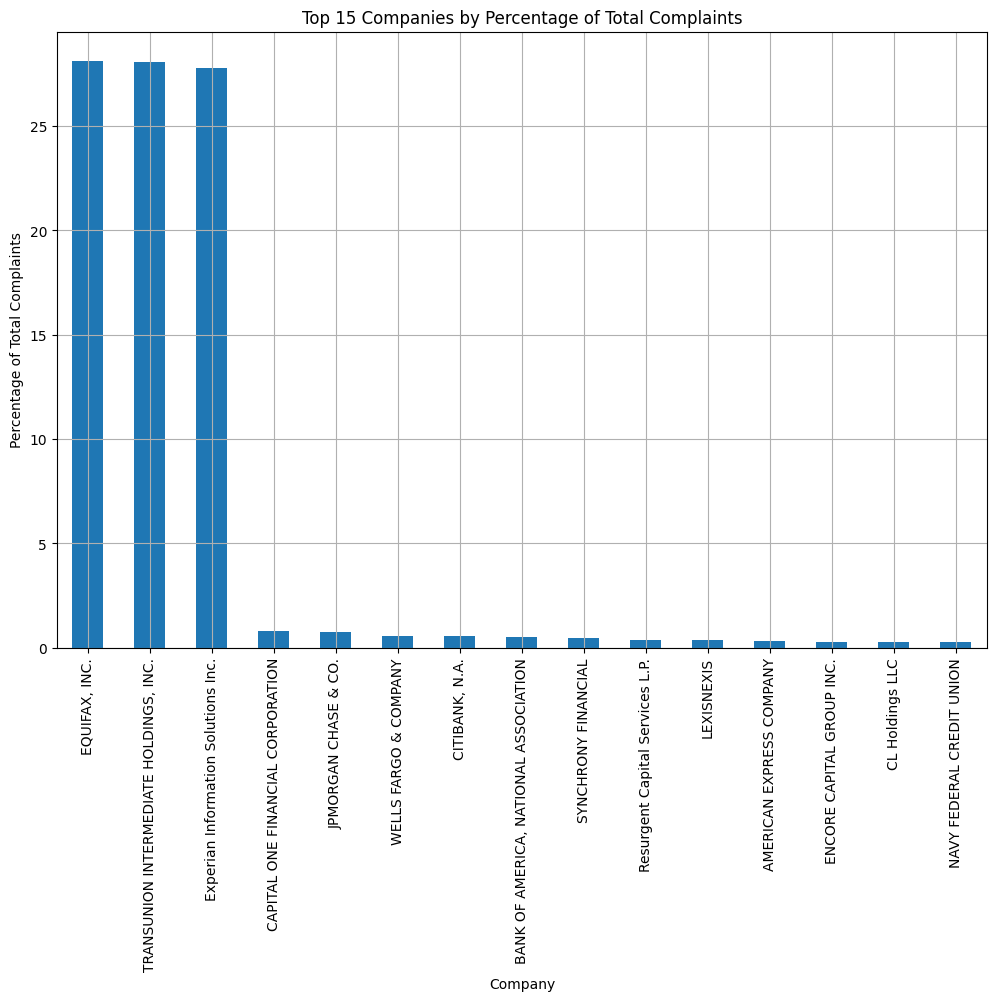

In [35]:
# Ensure the 'Company' column has no leading/trailing spaces in its values
data['Company'] = data['Company'].str.strip()

# Count the number of complaints for each company
company_counts = data['Company'].value_counts()

# Get the top 15 companies with the most complaints
top_15_companies = company_counts.head(15)

# Create a DataFrame for the top 15 companies
top_15_companies_df = pd.DataFrame({
    'Company': top_15_companies.index,
    'Count': top_15_companies.values
})

# Calculate the percentage of total complaints for these companies
total_complaints = len(data)
top_15_companies_df['Percentage'] = (top_15_companies_df['Count'] / total_complaints) * 100

# Print the results
print("Top 15 companies with the most complaints and the percentage of total complaints:")
print(top_15_companies_df)

# Optionally, plot the distribution
import matplotlib.pyplot as plt

# Plot the distribution of the top 15 companies
plt.figure(figsize=(12, 8))
top_15_companies_df.set_index('Company')['Percentage'].plot(kind='bar')
plt.title('Top 15 Companies by Percentage of Total Complaints')
plt.xlabel('Company')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**
- The three credit agencies, Equifax, Transunion, and Experian dominate as expected.
- After the credit agencies, large banks and financial institutions are the next most common target of complaints, which is not surprising given the number of customers these institutions serve.
- Some lesser-known companies in the top 15 include Resurgent Capital Services, LLC, LexisNexis, Encore Capital Group, and CL HOldings LLC.

**Additional information provided by ChatGPT and web search:**
- Resurgent Capital Services, LLC, specializes in debt collection, debt consolidation, and financial recovery services. They manage debt portfolios and provide credit and payment services.
- LexisNexis Risk Solutions provides data and analytics services to various industries, including insurance, healthcare, financial services, and government.
- Encore Capital Group, Inc., is a major player in the debt buying and collection industry. Alongside its subsidiaries, Midland Funding, LLC, Midland Credit Management, Inc., and Asset Acceptance Capital Corp., Encore forms one of the largest debt collection entities in the United States.
- CL Holdings, Inc. is the parent company of debt-buyer Jefferson Capital Systems, LLC.


#### State


Top 10 states with the most complaints and the percentage of total complaints:
  State  Count  Percentage
0    FL  29926   14.251223
1    TX  27244   12.974013
2    CA  21053   10.025763
3    GA  15844    7.545157
4    NY  13821    6.581773
5    PA  10100    4.809776
6    IL   9887    4.708342
7    NJ   6970    3.319221
8    NC   6661    3.172071
9    MI   5125    2.440604


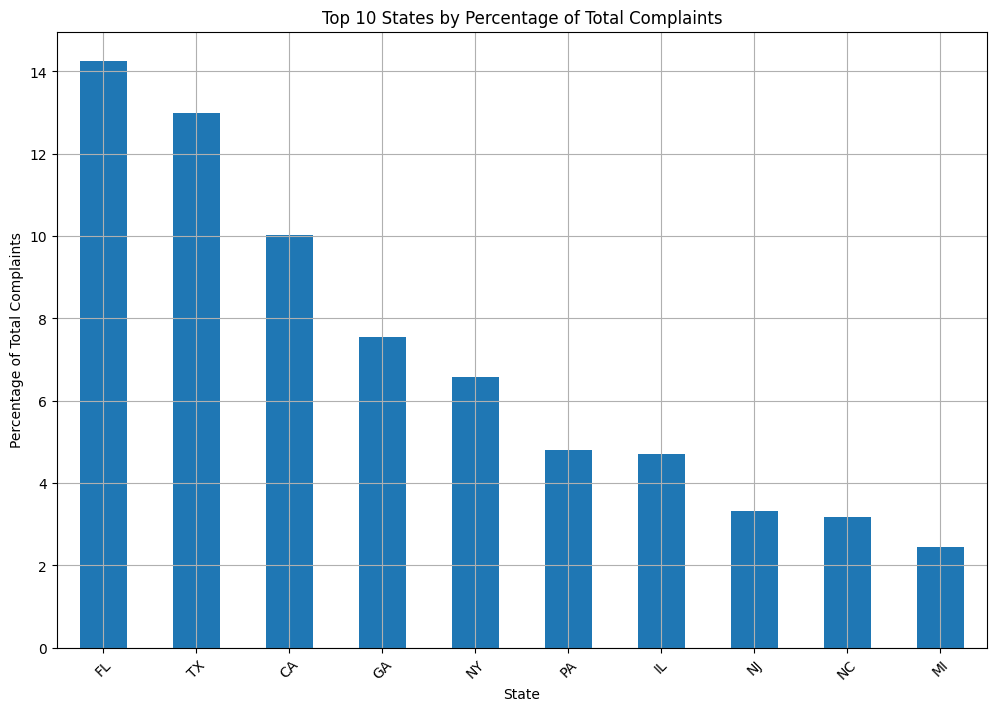

In [36]:
# Ensure the 'State' column has no leading/trailing spaces in its values
data['State'] = data['State'].str.strip()

# Count the number of complaints for each state
state_counts = data['State'].value_counts()

# Get the top 10 states with the most complaints
top_10_states = state_counts.head(10)

# Create a DataFrame for the top 10 states
top_10_states_df = pd.DataFrame({
    'State': top_10_states.index,
    'Count': top_10_states.values
})

# Calculate the percentage of total complaints for these states
total_complaints = len(data)
top_10_states_df['Percentage'] = (top_10_states_df['Count'] / total_complaints) * 100

# Print the results
print("Top 10 states with the most complaints and the percentage of total complaints:")
print(top_10_states_df)

# Plot the distribution of the top 10 states
plt.figure(figsize=(12, 8))
top_10_states_df.set_index('State')['Percentage'].plot(kind='bar')
plt.title('Top 10 States by Percentage of Total Complaints')
plt.xlabel('State')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Tags

Top tags with the most complaints and the percentage of total complaints:
                            Tags   Count  Percentage
0                        No tags  201683   96.044555
1                  Servicemember    5787    2.755859
2                 Older American    1975    0.940525
3  Older American, Servicemember     544    0.259061


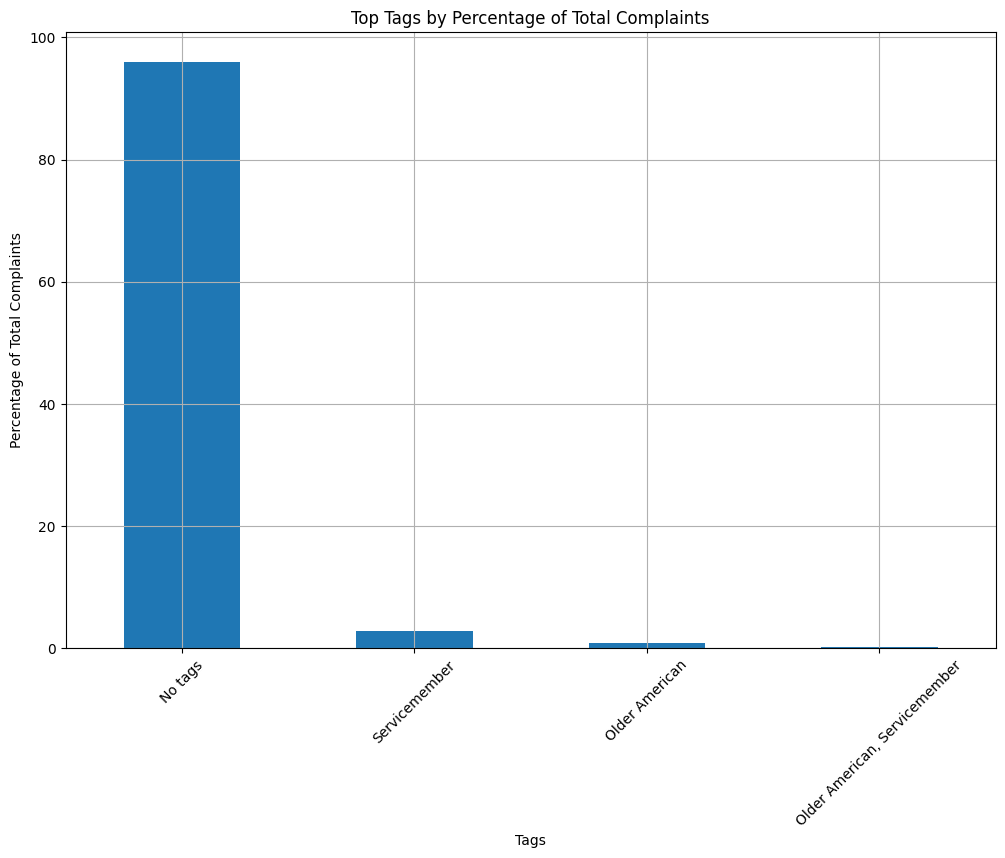

In [37]:
# Ensure the 'Tags' column has no leading/trailing spaces in its values
data['Tags'] = data['Tags'].str.strip()

# Count the number of complaints for each tag
tag_counts = data['Tags'].value_counts()

# Get the top tags with the most complaints
top_tags = tag_counts.head(10)

# Create a DataFrame for the top tags
top_tags_df = pd.DataFrame({
    'Tags': top_tags.index,
    'Count': top_tags.values
})

# Calculate the percentage of total complaints for these tags
total_complaints = len(data)
top_tags_df['Percentage'] = (top_tags_df['Count'] / total_complaints) * 100

# Print the results
print("Top tags with the most complaints and the percentage of total complaints:")
print(top_tags_df)

# Plot the distribution of the top tags
plt.figure(figsize=(12, 8))
top_tags_df.set_index('Tags')['Percentage'].plot(kind='bar')
plt.title('Top Tags by Percentage of Total Complaints')
plt.xlabel('Tags')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations**
- These tags identify complaints submitted by Servicemembers and Older Americans.
- 2.76% of complaints were submitted by servicemembers
- 0.94% of complaints were submitted by older Americans (62 years and older)
- 0.26% of complaints were submitted by service members who are also older Americants.

#### Submitted Via

Top submission methods with the most complaints and the percentage of total complaints:
  Submitted via   Count  Percentage
0           Web  206492   98.334675
1         Phone    1783    0.849092
2      Referral     930    0.442880
3   Postal mail     784    0.373353


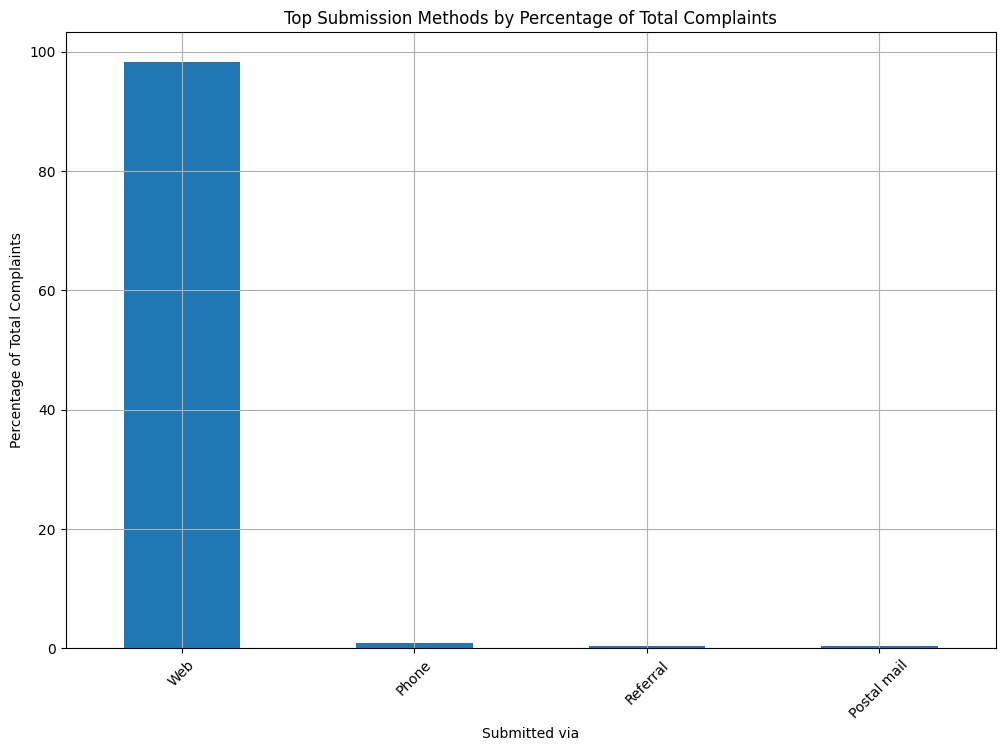

In [38]:
# Ensure the 'Submitted via' column has no leading/trailing spaces in its values
data['Submitted via'] = data['Submitted via'].str.strip()

# Count the number of complaints for each submission method
submission_counts = data['Submitted via'].value_counts()

# Get the top submission methods with the most complaints
top_submission_methods = submission_counts.head(10)

# Create a DataFrame for the top submission methods
top_submission_methods_df = pd.DataFrame({
    'Submitted via': top_submission_methods.index,
    'Count': top_submission_methods.values
})

# Calculate the percentage of total complaints for these submission methods
total_complaints = len(data)
top_submission_methods_df['Percentage'] = (top_submission_methods_df['Count'] / total_complaints) * 100

# Print the results
print("Top submission methods with the most complaints and the percentage of total complaints:")
print(top_submission_methods_df)

# Plot the distribution of the top submission methods
plt.figure(figsize=(12, 8))
top_submission_methods_df.set_index('Submitted via')['Percentage'].plot(kind='bar')
plt.title('Top Submission Methods by Percentage of Total Complaints')
plt.xlabel('Submitted via')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations**
- 98.33% of complaints are submitted via the web.

#### Date Sent to Company


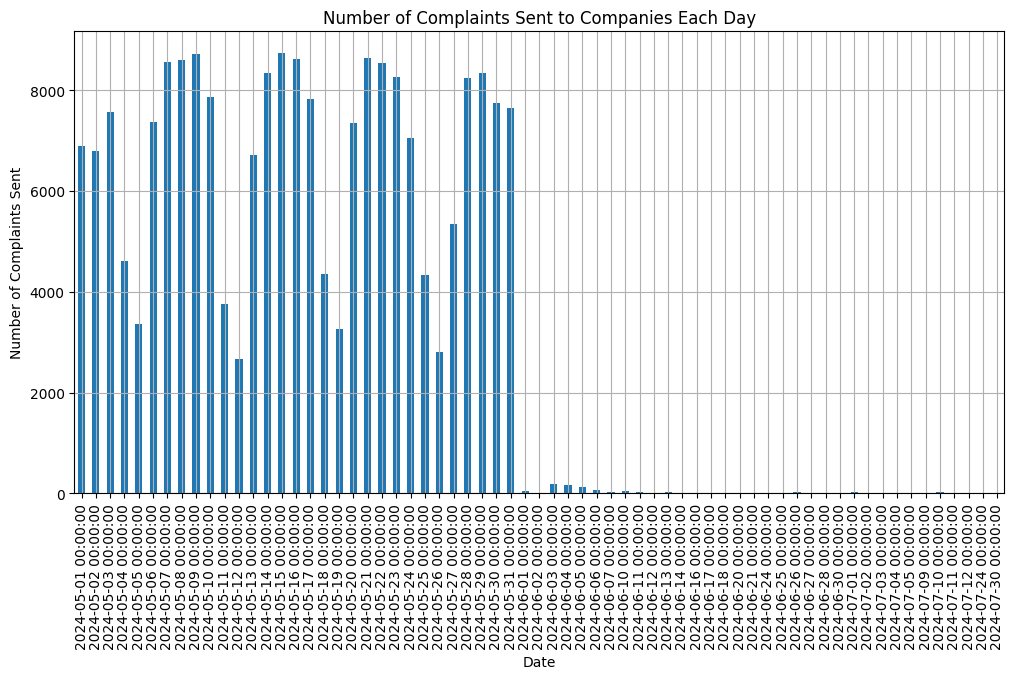

In [39]:
# Count the number of complaints sent per day
complaints_sent_per_day = data['Date sent to company'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(12, 6))
complaints_sent_per_day.plot(kind='bar')
plt.title('Number of Complaints Sent to Companies Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Complaints Sent')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**
- Most complaints were sent to companies in the month of May, but a small number were sent to companies in June and July. It is possible that additional responses could be added after the date this data was downloaded.

#### Company Response to consumer

Top responses with the most complaints and the percentage of total complaints:
      Company response to consumer   Count  Percentage
0  Closed with non-monetary relief  100672   47.941559
1          Closed with explanation   90297   43.000824
2                      In progress   17153    8.168523
3      Closed with monetary relief    1823    0.868141
4                Untimely response      41    0.019525
5                      No response       3    0.001429


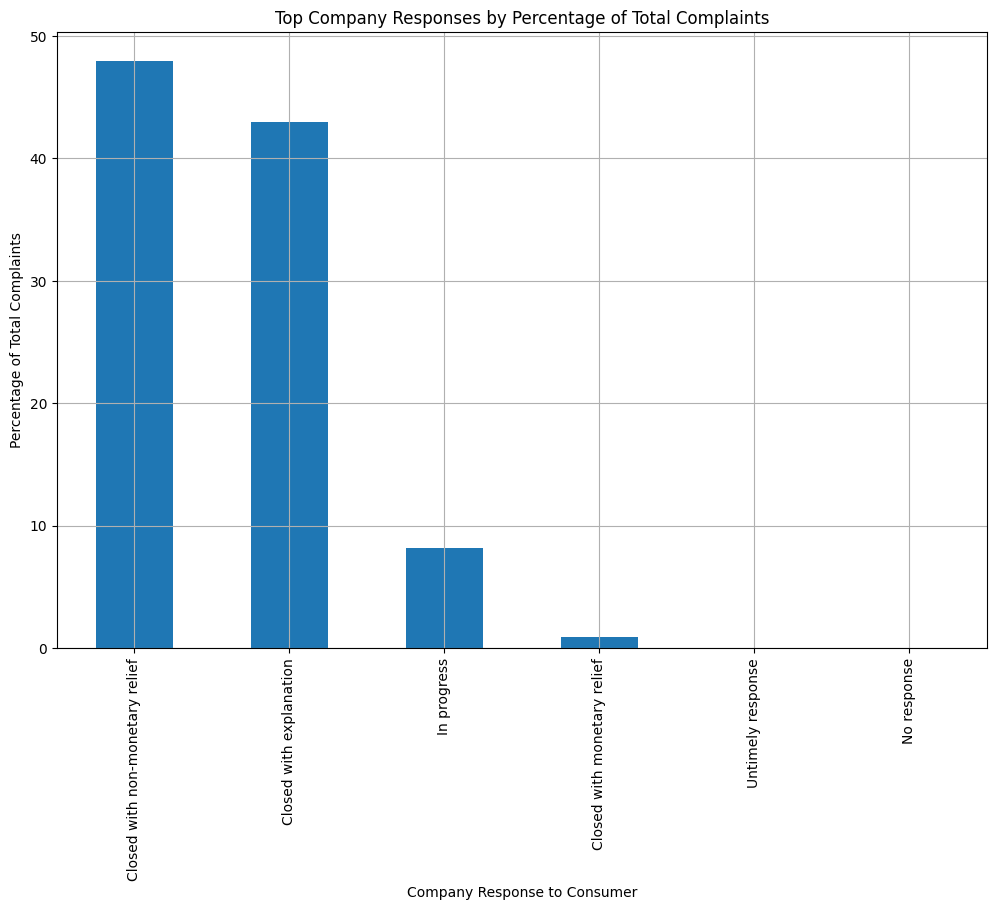

In [40]:
# Ensure the 'Company response to consumer' column has no leading/trailing spaces in its values
data['Company response to consumer'] = data['Company response to consumer'].str.strip()

# Count the number of complaints for each response
response_counts = data['Company response to consumer'].value_counts()

# Get the top responses with the most complaints
top_responses = response_counts.head(10)

# Create a DataFrame for the top responses
top_responses_df = pd.DataFrame({
    'Company response to consumer': top_responses.index,
    'Count': top_responses.values
})

# Calculate the percentage of total complaints for these responses
total_complaints = len(data)
top_responses_df['Percentage'] = (top_responses_df['Count'] / total_complaints) * 100

# Print the results
print("Top responses with the most complaints and the percentage of total complaints:")
print(top_responses_df)

# Plot the distribution of the top responses
plt.figure(figsize=(12, 8))
top_responses_df.set_index('Company response to consumer')['Percentage'].plot(kind='bar')
plt.title('Top Company Responses by Percentage of Total Complaints')
plt.xlabel('Company Response to Consumer')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Observations**
- The most common response (47.94%) was "Closed with non-monetary relief".
- The next most common (43.00%) was "Closed with explanation".
- The next most common categiry is "In Progress".
- 0.87% were closed with monetary relief.

#### Timely Response

Distribution of Timely Responses and the Percentage of Total Complaints:
  Timely response   Count  Percentage
0             Yes  209644   99.835706
1              No     345    0.164294


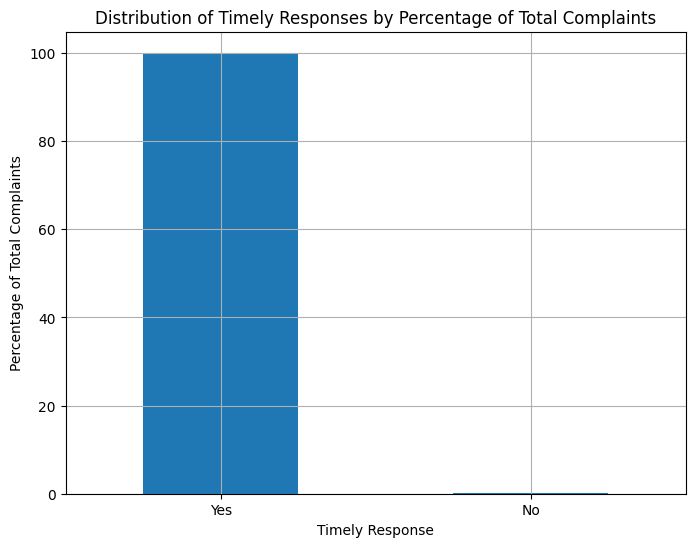

In [41]:
# Ensure the 'Timely response?' column has no leading/trailing spaces in its values
data['Timely response?'] = data['Timely response?'].str.strip()

# Count the number of complaints for each timely response category
timely_response_counts = data['Timely response?'].value_counts()

# Create a DataFrame for the timely response distribution
timely_response_df = pd.DataFrame({
    'Timely response': timely_response_counts.index,
    'Count': timely_response_counts.values
})

# Calculate the percentage of total complaints for each timely response category
total_complaints = len(data)
timely_response_df['Percentage'] = (timely_response_df['Count'] / total_complaints) * 100

# Print the results
print("Distribution of Timely Responses and the Percentage of Total Complaints:")
print(timely_response_df)

# Plot the distribution of timely responses
plt.figure(figsize=(8, 6))
timely_response_df.set_index('Timely response')['Percentage'].plot(kind='bar')
plt.title('Distribution of Timely Responses by Percentage of Total Complaints')
plt.xlabel('Timely Response')
plt.ylabel('Percentage of Total Complaints')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Observations**
- Only a very small number of complaints (0.16%) do not receive timely responses.

### Multivariate Analysis

#### Duplicate Narratives by Product

                                              Product  \
2   Credit reporting or other personal consumer re...   
3                                     Debt collection   
1                                         Credit card   
4                           Debt or credit management   
8                                        Prepaid card   
10                              Vehicle loan or lease   
7   Payday loan, title loan, personal loan, or adv...   
9                                        Student loan   
0                         Checking or savings account   
5   Money transfer, virtual currency, or money ser...   
6                                            Mortgage   

    Percentage of Duplicate Narratives  
2                            49.505840  
3                            41.895882  
1                            21.992641  
4                             4.672897  
8                             3.076923  
10                            1.463415  
7                           

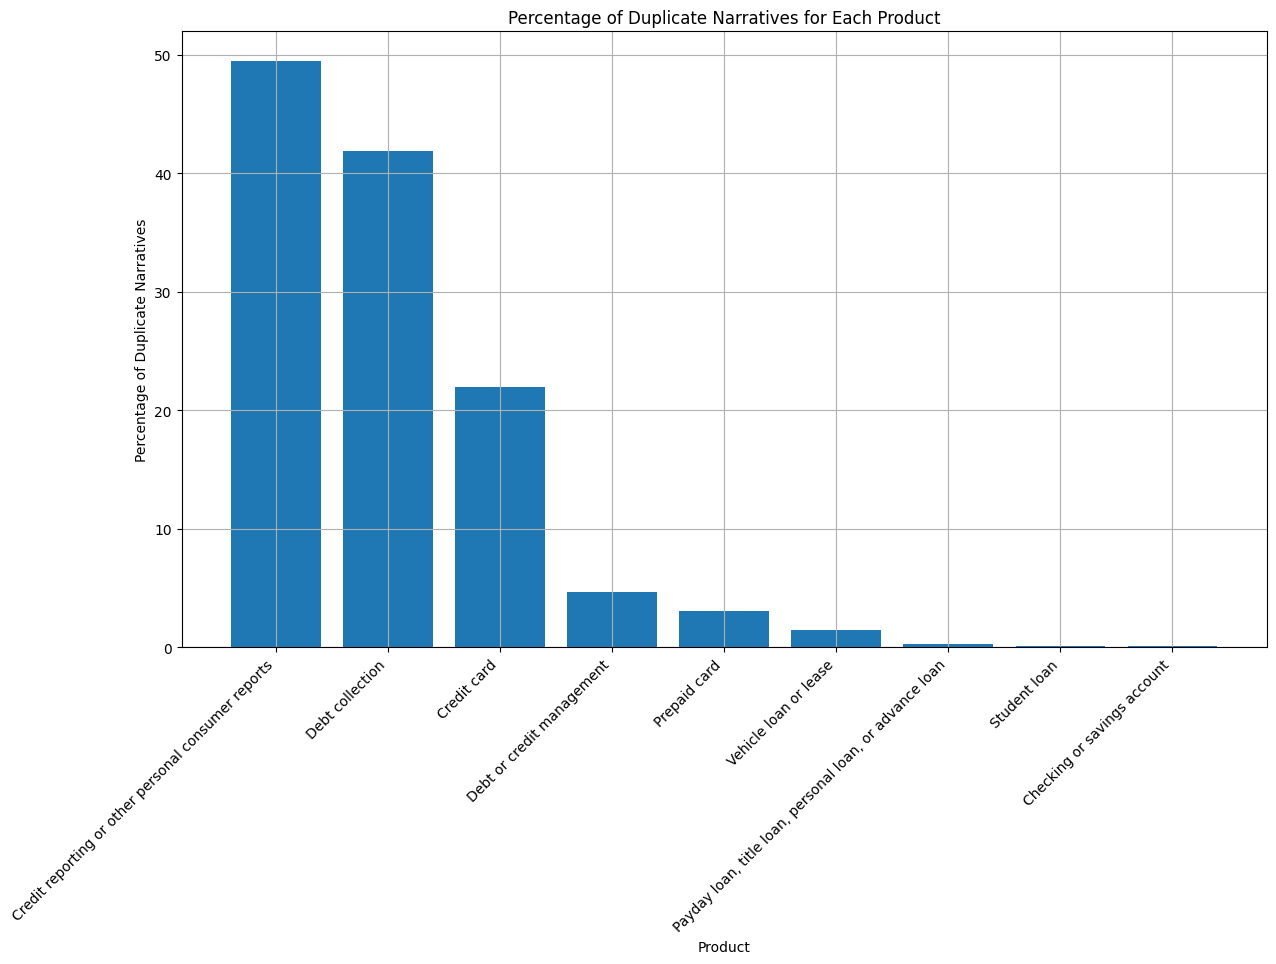

In [42]:
# Filter out empty strings
narratives_non_empty = data[data['Consumer complaint narrative'] != '']

# Identify unique duplicates (mark the first occurrence of each duplicate narrative as True)
unique_duplicates = narratives_non_empty['Consumer complaint narrative'].duplicated(keep='first')

# Get the unique duplicate narratives
unique_duplicate_narratives = narratives_non_empty[unique_duplicates]

# Count the total number of narratives for each product
total_narratives_per_product = narratives_non_empty['Product'].value_counts()

# Count the number of unique duplicate narratives for each product
duplicates_per_product = unique_duplicate_narratives['Product'].value_counts()

# Calculate the percentage of duplicate narratives for each product
percentage_duplicates_per_product = (duplicates_per_product / total_narratives_per_product) * 100

# Create a DataFrame for the results
percentage_duplicates_per_product_df = pd.DataFrame({
    'Product': percentage_duplicates_per_product.index,
    'Percentage of Duplicate Narratives': percentage_duplicates_per_product.values
}).sort_values(by='Percentage of Duplicate Narratives', ascending=False)

# Print the results
print(percentage_duplicates_per_product_df)

# Plot the percentage of duplicate narratives for each product
plt.figure(figsize=(14, 8))
plt.bar(percentage_duplicates_per_product_df['Product'], percentage_duplicates_per_product_df['Percentage of Duplicate Narratives'])
plt.title('Percentage of Duplicate Narratives for Each Product')
plt.xlabel('Product')
plt.ylabel('Percentage of Duplicate Narratives')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

**Observations**
- A large percentage of complaints for credit reporting and debt collection that include consumer narratives include duplicate narrative responses.
- 49.51% of credit reporting complaints with consumer narratives have duplicate narratives.
- 41.90% of debt collection complaints with consumer narratives have duplicate narratives.
- Duplication of narratives is far less common for other products and services, including payday loans, student loans, and checking or savings account.

#### Top Duplicate Narrative Responses by Day of Week Submitted

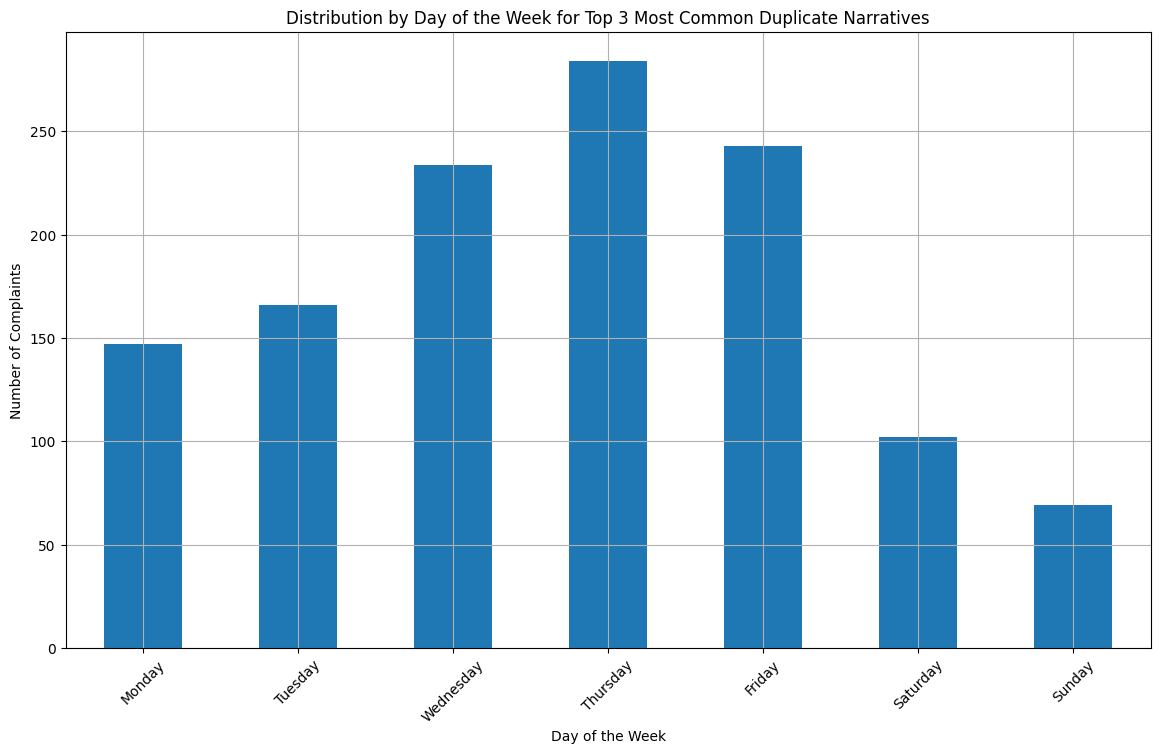

In [43]:
# Ensure the 'Consumer complaint narrative' column has no leading/trailing spaces in its values
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].astype(str).str.strip()

# Filter out empty strings
narratives_non_empty = data[data['Consumer complaint narrative'] != '']

# Identify unique duplicates (mark the first occurrence of each duplicate narrative as True)
unique_duplicates = narratives_non_empty['Consumer complaint narrative'].duplicated(keep='first')

# Get the unique duplicate narratives
unique_duplicate_narratives = narratives_non_empty[unique_duplicates]

# Count the occurrences of each duplicate narrative
duplicate_counts = unique_duplicate_narratives['Consumer complaint narrative'].value_counts()

# Get the top 3 most common duplicate narratives
top_3_duplicates = duplicate_counts.head(3)

# Extract day of the week from 'Date received'
data['Day of Week'] = data['Date received'].dt.day_name()

# Filter the data to include only rows with the top 3 duplicate narratives
top_3_narratives_data = data[data['Consumer complaint narrative'].isin(top_3_duplicates.index)]

# Plot the distribution by day of the week for each narrative
plt.figure(figsize=(14, 8))

for narrative in top_3_duplicates.index:
    # Filter data for the current narrative
    narrative_data = top_3_narratives_data[top_3_narratives_data['Consumer complaint narrative'] == narrative]

    # Count the number of occurrences by day of the week
    day_of_week_counts = narrative_data['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    # Plot the data
    day_of_week_counts.plot(kind='bar', label=f'{narrative} (Count: {top_3_duplicates[narrative]})')

plt.title('Distribution by Day of the Week for Top 3 Most Common Duplicate Narratives')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Unique Narratives by Day of Week

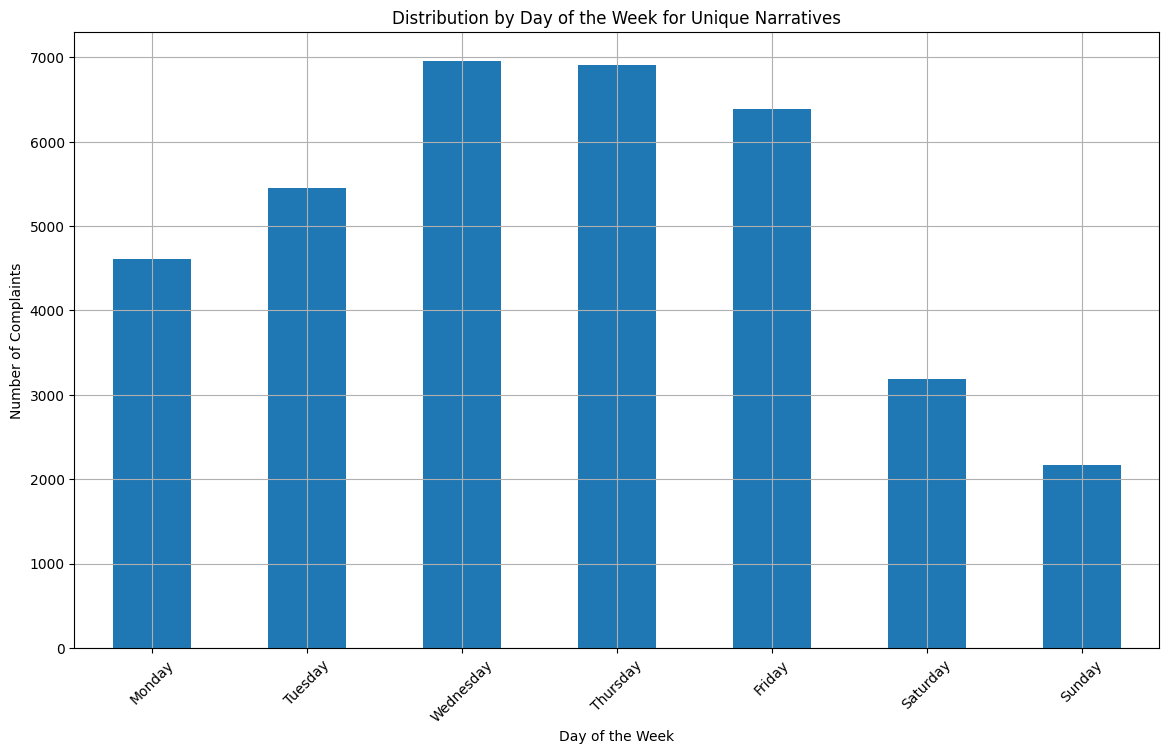

In [44]:
# Ensure the 'Consumer complaint narrative' column has no leading/trailing spaces in its values
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].astype(str).str.strip()

# Filter out empty strings
narratives_non_empty = data[data['Consumer complaint narrative'] != '']

# Identify unique narratives (mark the first occurrence of each unique narrative as True)
unique_narratives = ~narratives_non_empty['Consumer complaint narrative'].duplicated(keep=False)

# Get the unique narratives
unique_narratives_data = narratives_non_empty.loc[unique_narratives]

# Extract day of the week from 'Date received'
unique_narratives_data.loc[:, 'Day of Week'] = unique_narratives_data['Date received'].dt.day_name()

# Count the number of occurrences by day of the week for unique narratives
day_of_week_counts_unique = unique_narratives_data['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the distribution by day of the week for unique narratives
plt.figure(figsize=(14, 8))
day_of_week_counts_unique.plot(kind='bar')
plt.title('Distribution by Day of the Week for Unique Narratives')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Combined: Product, Sub-product, Issue, Sub-issues

                                            Combined  Count  Percentage
0  Credit reporting or other personal consumer re...  53832   25.635629
1  Credit reporting or other personal consumer re...  38729   18.443347
2  Credit reporting or other personal consumer re...  22197   10.570554
3  Credit reporting or other personal consumer re...  18040    8.590926
4  Credit reporting or other personal consumer re...  10774    5.130745
5  Credit reporting or other personal consumer re...  10112    4.815490
6  Credit reporting or other personal consumer re...   9120    4.343085
7  Credit reporting or other personal consumer re...   4963    2.363457
8  Credit reporting or other personal consumer re...   4809    2.290120
9  Debt collection | I do not know | Attempts to ...   1823    0.868141


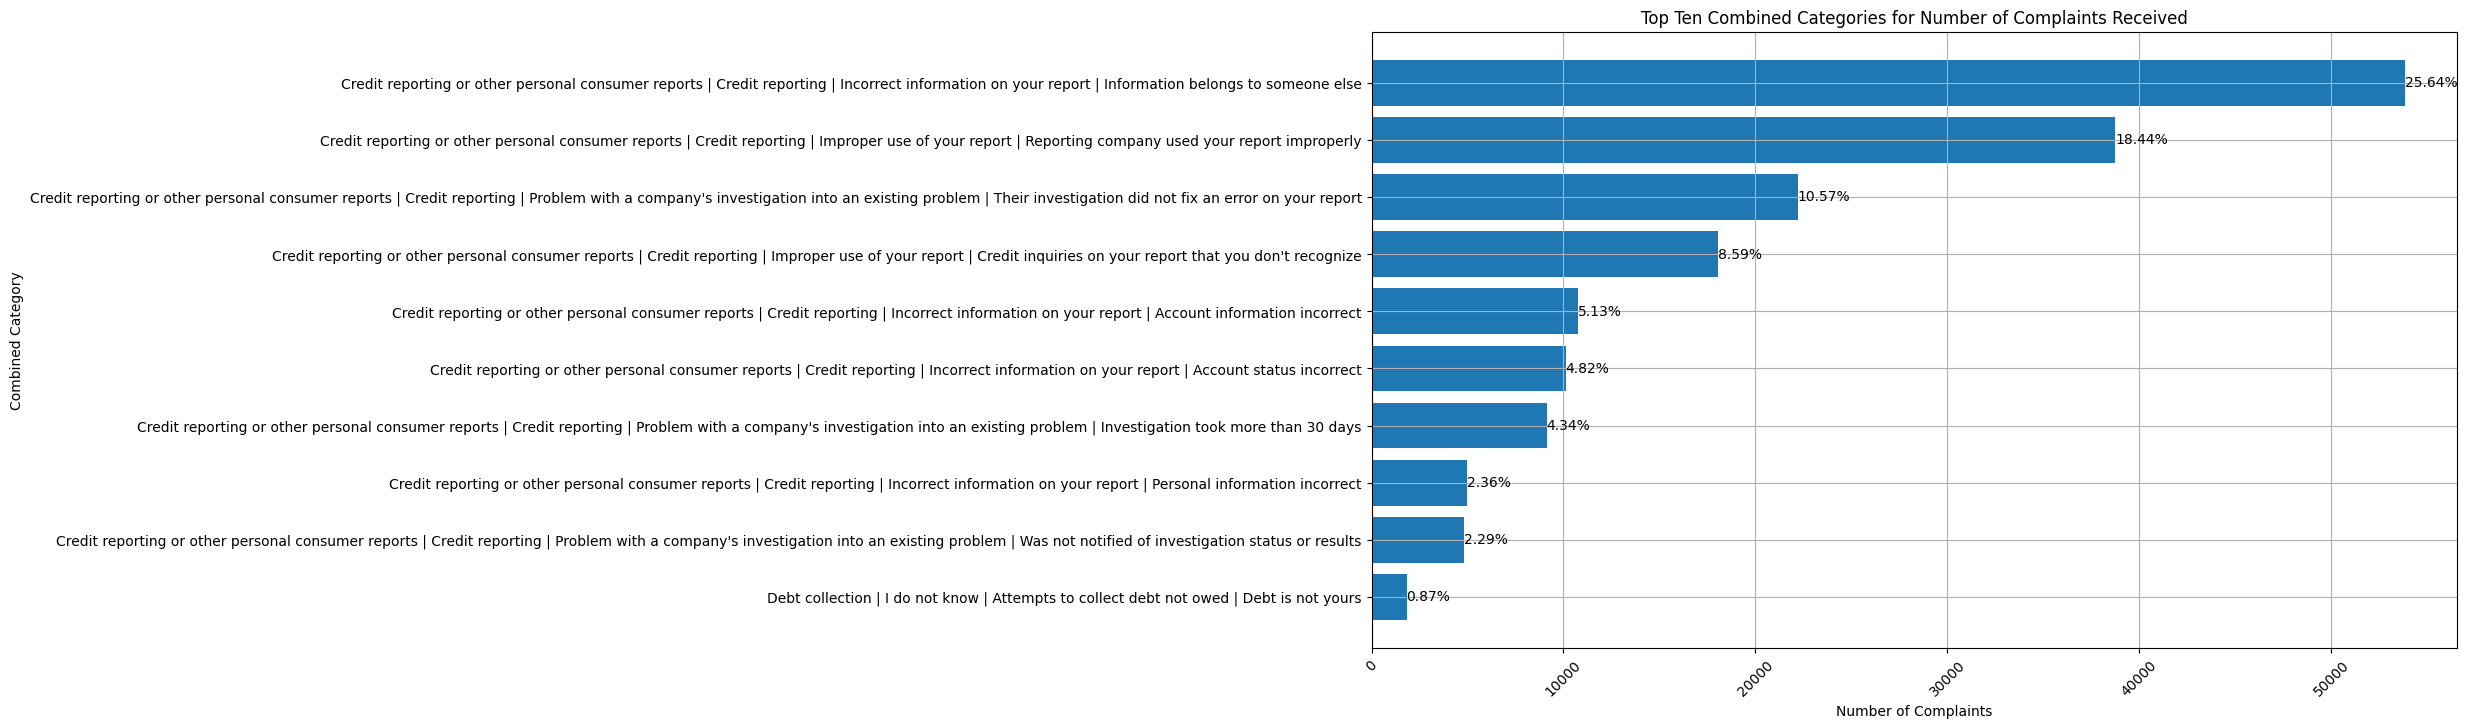

In [45]:
# Ensure the relevant columns have no leading/trailing spaces in their values
data['Product'] = data['Product'].astype(str).str.strip()
data['Sub-product'] = data['Sub-product'].astype(str).str.strip()
data['Issue'] = data['Issue'].astype(str).str.strip()
data['Sub-issue'] = data['Sub-issue'].astype(str).str.strip()

# Create a combined column
data['Combined'] = data['Product'] + ' | ' + data['Sub-product'] + ' | ' + data['Issue'] + ' | ' + data['Sub-issue']

# Count the number of complaints for each combined category
combined_counts = data['Combined'].value_counts()

# Get the top ten combined categories
top_10_combined = combined_counts.head(10)

# Calculate the percentage of total complaints for these top ten categories
total_complaints = len(data)
top_10_combined_df = pd.DataFrame({
    'Combined': top_10_combined.index,
    'Count': top_10_combined.values,
    'Percentage': (top_10_combined.values / total_complaints) * 100
})

# Print the results
print(top_10_combined_df)

# Plot the distribution of the top ten combined categories
plt.figure(figsize=(14, 8))
plt.barh(top_10_combined_df['Combined'], top_10_combined_df['Count'])
plt.title('Top Ten Combined Categories for Number of Complaints Received')
plt.xlabel('Number of Complaints')
plt.ylabel('Combined Category')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.grid(True)

# Annotate the bars with the percentage values
for index, value in enumerate(top_10_combined_df['Count']):
    plt.text(value, index, f'{top_10_combined_df["Percentage"].iloc[index]:.2f}%', va='center')

plt.show()

**Observations**
- The most common combined issue is for incorect credit report information, where the report contains information that belongs to someone else (25.64%).
- The second most common combined issue is for the improper use of a consumer report. Specifically, that the reporting company used the report improperly (18.44%). This sounds like something that should be directed to companies that use credit reports more than the credit reporting agencies.
- The third most common combined issue is that the company's investigation did not fix an error in the consumer's report (10.57%).

#### Additional Exploration of Duplicate Narratives

In [49]:
# Filter out rows with non-empty consumer complaint narratives
filtered_data = data[data['Consumer complaint narrative'] != ""]

# Initialize lists to store results
products = []
total_narratives = []
duplicate_narratives = []
duplicate_percentage = []

# Group by Product and calculate the required metrics
for product, group in filtered_data.groupby('Product'):
    total = group['Consumer complaint narrative'].count()
    duplicates = group['Consumer complaint narrative'].duplicated().sum()
    duplicate_percent = (duplicates / total) * 100

    products.append(product)
    total_narratives.append(total)
    duplicate_narratives.append(duplicates)
    duplicate_percentage.append(duplicate_percent)

# Create a DataFrame from the lists
duplicate_analysis = pd.DataFrame({
    'Product': products,
    'total_narratives': total_narratives,
    'duplicate_narratives': duplicate_narratives,
    'duplicate_percentage': duplicate_percentage
})

# Display the result
duplicate_analysis


,Product,total_narratives,duplicate_narratives,duplicate_percentage
0,Checking or savings account,2521,1,0.039667
1,Credit card,3533,736,20.832154
2,Credit reporting or other personal consumer re...,54537,26958,49.430662
3,Debt collection,6435,2656,41.274281
4,Debt or credit management,107,3,2.803738
5,"Money transfer, virtual currency, or money ser...",761,0,0.000000
6,Mortgage,915,0,0.000000
7,"Payday loan, title loan, personal loan, or adv...",412,1,0.242718
8,Prepaid card,325,10,3.076923
9,Student loan,715,0,0.000000


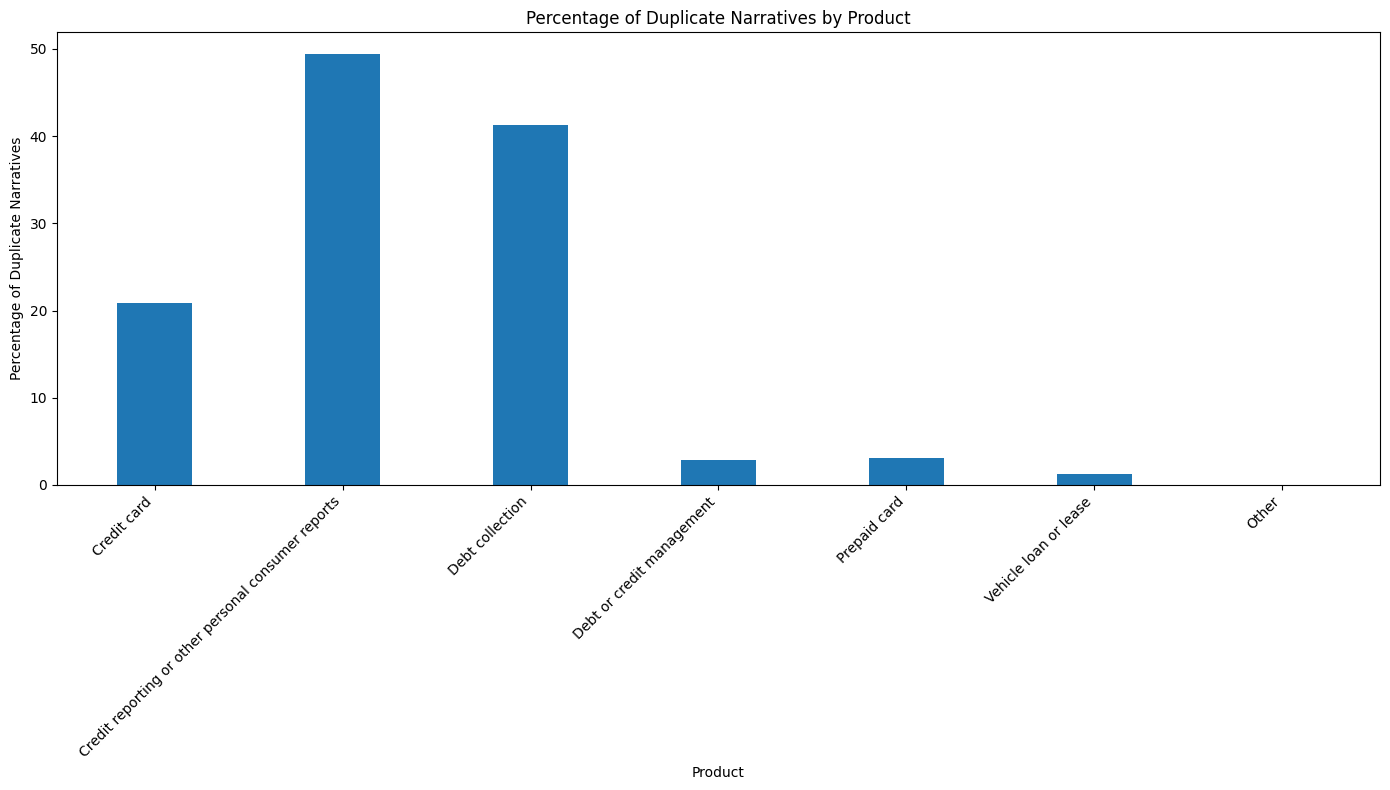

In [58]:
# Filter out rows with non-empty consumer complaint narratives
filtered_data = data[data['Consumer complaint narrative'] != ""]

# Initialize lists to store results
products = []
total_narratives = []
duplicate_narratives = []
duplicate_percentage = []

# Group by Product and calculate the required metrics
for product, group in filtered_data.groupby('Product'):
    total = group['Consumer complaint narrative'].count()
    duplicates = group['Consumer complaint narrative'].duplicated().sum()
    duplicate_percent = (duplicates / total) * 100

    products.append(product)
    total_narratives.append(total)
    duplicate_narratives.append(duplicates)
    duplicate_percentage.append(duplicate_percent)

# Create a DataFrame from the lists
duplicate_analysis = pd.DataFrame({
    'Product': products,
    'total_narratives': total_narratives,
    'duplicate_narratives': duplicate_narratives,
    'duplicate_percentage': duplicate_percentage
})

# Group products with less than 1% into "Other" category
threshold = 1
other_data = duplicate_analysis[duplicate_analysis['duplicate_percentage'] < threshold]
other_total_narratives = other_data['total_narratives'].sum()
other_duplicate_narratives = other_data['duplicate_narratives'].sum()
other_percentage = (other_duplicate_narratives / other_total_narratives) * 100

# Create "Other" row
other_row = pd.DataFrame({
    'Product': ['Other'],
    'total_narratives': [other_total_narratives],
    'duplicate_narratives': [other_duplicate_narratives],
    'duplicate_percentage': [other_percentage]
})

# Filter out products with less than 1%
filtered_data = duplicate_analysis[duplicate_analysis['duplicate_percentage'] >= threshold]

# Append the "Other" row
updated_data = pd.concat([filtered_data, other_row], ignore_index=True)

# Display the updated data
updated_data

# Ensure the charts are displayed in the notebook
%matplotlib inline

# Bar chart for percentage of duplicate narratives
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart for duplicate percentage
ax.bar(updated_data['Product'], updated_data['duplicate_percentage'], width=0.4)

ax.set_xlabel('Product')
ax.set_ylabel('Percentage of Duplicate Narratives')
ax.set_title('Percentage of Duplicate Narratives by Product')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Findings and Insights

- Volume and Timeliness of Complaints:
    - A total of 209,989 complaints were submitted in May 2024.
    - 99.84% of complaints received a timely response.

- Most Common Products and Issues:
    - Products: The majority of complaints (85.69%) were related to credit reporting, followed by debt collection (5.84%), and credit card issues (3.18%).
    - Issues: The most frequent issues were "Incorrect information on your report" (39.54%), "Improper use of your report" (27.30%), and "Problem with a company's investigation into an existing issue" (18.91%).

- Sub-Product and Sub-Issue Analysis:
    - Sub-Products: Credit reporting (85.38%) dominated, followed by general-purpose credit cards (2.85%) and unknown sub-products (2.46%).
    - Sub-Issues: The leading sub-issue was "Information belongs to someone else" (25.73%).

- Consumer Complaint Narratives:
    - 33.75% of complaints included a narrative.
    - However, approximately 50% of these narratives are identical to at least one other complaint narrative, suggesting that many complaints may have been submitted using template language.
    - The top narrative themes involved legal references to the Fair Credit Reporting Act, highlighting consumers' knowledge and the legal grounding of their complaints.

- Company Responses:
    - The majority of company responses were either "Closed with non-monetary relief" (47.94%) or "Closed with explanation" (43.00%).
    - There was a high prevalence of templated responses, particularly from credit reporting agencies, indicating a standardized approach to handling complaints.

- Geographical Distribution:
    - The highest number of complaints came from Florida (14.25%), Texas (12.97%), and California (10.03%).
    - This distribution may reflect population sizes, economic activity levels, or regional issues with financial services.

- Submission Methods:
    - An overwhelming majority (98.33%) of complaints were submitted via the web, emphasizing the importance of online accessibility for consumers to file complaints.

- Tags and Demographics:
    - 2.76% of complaints were from servicemembers, and 0.94% were from older Americans, indicating specific demographic groups that are actively using the CFPB complaint system.